# Project Name: Housing Price Prediction

# Problem Statement:

Surprise Housing, a US based housing company, wants to use data analytics to purchase houses in the Australian market. For this, the company has collected a data set from the sale of houses in Australia to purchase houses at prices below the actual values to flip them at a higher price. 
We are required to build a machine learning model in order to predict the actual value of prospective properties and decide whether to invest or not. 

Business Goal : Model the house prices with available independent variables which will be used by the management to udnerstand how the prices vary with the variables. This will help them to manipulate the strategy of the firm and concentrate on areas that will yield high returns. 

# Import Libraries

In [261]:
#data processing
import pandas as pd
import numpy as np

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",100)

#data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

#machine learning algorithms
import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import model_selection
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from xgboost import XGBRegressor

from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from scipy.stats import zscore

import warnings 
warnings.filterwarnings('ignore')

# Load the Dataset

In [170]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train.drop(['Id'], axis=1, inplace=True)
test.drop(['Id'], axis=1, inplace=True)

In [171]:
train.head() #checking first 5 rows-train

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0         120       RL          NaN     4928   Pave   NaN      IR1   
1          20       RL         95.0    15865   Pave   NaN      IR1   
2          60       RL         92.0     9920   Pave   NaN      IR1   
3          20       RL        105.0    11751   Pave   NaN      IR1   
4          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1         Lvl    AllPub    Inside       Mod        NAmes       Norm   
2         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4         Lvl    AllPub       FR2       Gtl       NWAmes       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm   TwnhsE     1Story            6            5       1976   
1       Norm     1Fam     1Story            8            6       1970   
2       Norm     1Fam     2Story            7            5       1996   
3       Norm     1Fam     1Story            6            6       1977   
4       Norm     1Fam     1Story            6            7       1977   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1976     Gable  CompShg     Plywood     Plywood       None   
1          1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2          1997     Gable  CompShg     MetalSd     MetalSd       None   
3          1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4          2000     Gable  CompShg     CemntBd     CmentBd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       Gd       TA           No   
1         0.0        Gd        Gd      PConc       TA       Gd           Gd   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3       480.0        TA        TA     CBlock       Gd       TA           No   
4       126.0        Gd        TA     CBlock       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          ALQ         120          Unf           0        958         1078   
1          ALQ         351          Rec         823       1043         2217   
2          GLQ         862          Unf           0        255         1117   
3          BLQ         705          Unf           0       1139         1844   
4          ALQ        1246          Unf           0        356         1602   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       958         0             0   
1    GasA        Ex          Y      SBrkr      2217         0             0   
2    GasA        Ex          Y      SBrkr      1127       886             0   
3    GasA        Ex          Y      SBrkr      1844         0             0   
4    GasA        Gd          Y      SBrkr      1602         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        958             0             0         2         0             2   
1       2217             1             0         2         0             4   
2       2013             1             0         2         1             3   
3       1844             0             0         2         0             3   
4       1602             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           1          TA   
1             1          Gd             8        Typ           1          TA   
2             1          TA             8        Typ           1          TA   
3             1          TA             7        Typ           

In [172]:
train.shape, test.shape

((1168, 80), (292, 79))

In [173]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    954 non-null    float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   Alley          77 non-null     object 
 6   LotShape       1168 non-null   object 
 7   LandContour    1168 non-null   object 
 8   Utilities      1168 non-null   object 
 9   LotConfig      1168 non-null   object 
 10  LandSlope      1168 non-null   object 
 11  Neighborhood   1168 non-null   object 
 12  Condition1     1168 non-null   object 
 13  Condition2     1168 non-null   object 
 14  BldgType       1168 non-null   object 
 15  HouseStyle     1168 non-null   object 
 16  OverallQual    1168 non-null   int64  
 17  OverallCond    1168 non-null   int64  
 18  YearBuil

In [174]:
train.describe()  #statistical info

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1168.000000    954.00000    1168.000000  1168.000000  1168.000000   
mean     56.767979     70.98847   10484.749144     6.104452     5.595890   
std      41.940650     24.82875    8957.442311     1.390153     1.124343   
min      20.000000     21.00000    1300.000000     1.000000     1.000000   
25%      20.000000     60.00000    7621.500000     5.000000     5.000000   
50%      50.000000     70.00000    9522.500000     6.000000     5.000000   
75%      70.000000     80.00000   11515.500000     7.000000     6.000000   
max     190.000000    313.00000  164660.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1168.000000   1168.000000  1161.000000  1168.000000  1168.000000   
mean   1970.930651   1984.758562   102.310078   444.726027    46.647260   
std      30.145255     20.785185   182.595606   462.664785   163.520016   
min    1875.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1966.000000     0.000000     0.000000     0.000000   
50%    1972.000000   1993.000000     0.000000   385.500000     0.000000   
75%    2000.000000   2004.000000   160.000000   714.500000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1168.000000  1168.000000  1168.000000  1168.000000   1168.000000   
mean    569.721747  1061.095034  1169.860445   348.826199      6.380137   
std     449.375525   442.272249   391.161983   439.696370     50.892844   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     216.000000   799.000000   892.000000     0.000000      0.000000   
50%     474.000000  1005.500000  1096.500000     0.000000      0.000000   
75%     816.000000  1291.500000  1392.000000   729.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1168.000000   1168.000000   1168.000000  1168.000000  1168.000000   
mean   1525.066781      0.425514      0.055651     1.562500     0.388699   
std     528.042957      0.521615      0.236699     0.551882     0.504929   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1143.250000      0.000000      0.000000     1.000000     0.000000   
50%    1468.500000      0.000000      0.000000     2.000000     0.000000   
75%    1795.000000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   1168.000000   1168.000000   1168.000000  1168.000000  1104.000000   
mean       2.884418      1.045377      6.542808     0.617295  1978.193841   
std        0.817229      0.216292      1.598484     0.650575    24.890704   
min        0.000000      0.000000      2.000000     0.000000  1900.000000   
25%        2.000000      1.000000      5.000000     0.000000  1961.000000   
50%        3.000000      1.000000      6.000000     1.000000  1980.000000   
75%        3.000000      1.000000      7.000000     1.000000  2002.000000   
max        8.000000      3.000000     14.000000     3.000000  2010.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1168.000000  1168.000000  1168.000000  1168.000000    1168.000000   
mean      1.776541   476.860445    96.206336    46.559932      23.015411   
std       0.745554   214.466769   126.158988    66.381023      63.191089   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   338.000000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    24.000000       0.000000   
75%       2.000000   576.000000   171.000000    70.000000   

Technical Requirements:


• Train and Test Data combined contain 1460 entries each having 80 variables.

• Data contains Null values.  Data contains numerical as well as categorical variable.

• Extensive EDA will help us understand relationships of important variables and price.

• With Machine learning, we will find important features which affect the price positively or negatively.

• We will train on train.csv dataset and predict using test.csv file.

In [175]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

# EDA

Sales Price- Target variable

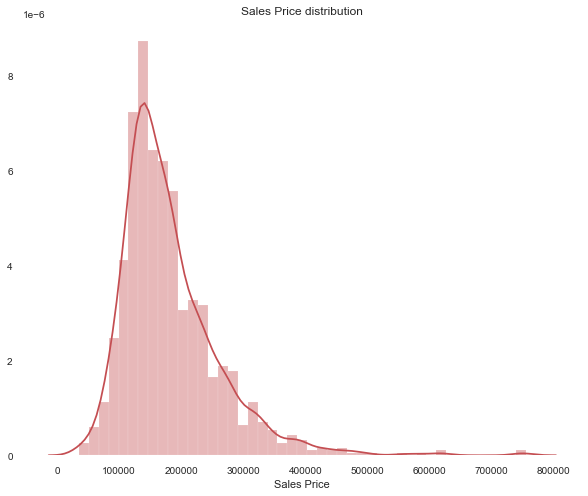

In [176]:
#Check the target distribution 
sns.set_color_codes(palette='deep')
f,ax = plt.subplots(figsize=(10, 8))
sns.distplot(train['SalePrice'], color="r");
ax.set(xlabel="Sales Price")
ax.set(title="Sales Price distribution")
plt.show()

In [177]:
#skewness of target
print("Skewness: %f" % train['SalePrice'].skew())

Skewness: 1.953878


In [178]:
#checking null values
nan_attributes = [i for i in train.columns if train[i].isnull().sum()>=1]
train[nan_attributes].isnull().sum()

LotFrontage      214
Alley           1091
MasVnrType         7
MasVnrArea         7
BsmtQual          30
BsmtCond          30
BsmtExposure      31
BsmtFinType1      30
BsmtFinType2      31
FireplaceQu      551
GarageType        64
GarageYrBlt       64
GarageFinish      64
GarageQual        64
GarageCond        64
PoolQC          1161
Fence            931
MiscFeature     1124
dtype: int64

In [179]:
# proportion of null values in Columns
train[nan_attributes].isnull().mean()

LotFrontage     0.183219
Alley           0.934075
MasVnrType      0.005993
MasVnrArea      0.005993
BsmtQual        0.025685
BsmtCond        0.025685
BsmtExposure    0.026541
BsmtFinType1    0.025685
BsmtFinType2    0.026541
FireplaceQu     0.471747
GarageType      0.054795
GarageYrBlt     0.054795
GarageFinish    0.054795
GarageQual      0.054795
GarageCond      0.054795
PoolQC          0.994007
Fence           0.797089
MiscFeature     0.962329
dtype: float64

In [180]:
#segregate numerical and categorical attributes
numerical_attributes = train.select_dtypes(include=["float64","int64"])
numerical_attributes

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0            120          NaN     4928            6            5       1976   
1             20         95.0    15865            8            6       1970   
2             60         92.0     9920            7            5       1996   
3             20        105.0    11751            6            6       1977   
4             20          NaN    16635            6            7       1977   
...          ...          ...      ...          ...          ...        ...   
1163          20          NaN     9819            5            5       1967   
1164          20         67.0     8777            4            5       1949   
1165         160         24.0     2280            6            6       1976   
1166          70         50.0     8500            4            4       1920   
1167          60          NaN     7861            6            5       2002   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0             1976         0.0         120           0        958   
1             1970         0.0         351         823       1043   
2             1997         0.0         862           0        255   
3             1977       480.0         705           0       1139   
4             2000       126.0        1246           0        356   
...            ...         ...         ...         ...        ...   
1163          1967        31.0         450           0        432   
1164          2003         0.0           0           0          0   
1165          1976         0.0         566           0        289   
1166          1950         0.0           0           0        649   
1167          2003         0.0         457           0        326   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0            1078       958         0             0        958             0   
1            2217      2217         0             0       2217             1   
2            1117      1127       886             0       2013             1   
3            1844      1844         0             0       1844             0   
4            1602      1602         0             0       1602             0   
...           ...       ...       ...           ...        ...           ...   
1163          882       900         0             0        900             0   
1164            0      1126         0             0       1126             0   
1165          855       855       601             0       1456             0   
1166          649       649       668             0       1317             0   
1167          783       807       702             0       1509             1   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0                0         2         0             2             1   
1                0         2         0             4             1   
2                0         2         1             3             1   
3                0         2         0             3             1   
4                1         2         0             3             1   
...            ...       ...       ...           ...           ...   
1163             0         1         0             3             1   
1164             0         2         0             2             1   
1165             0         2         1             3             1   
1166             0         1         0             3             1   
1167             0         2         1             3             1   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0                5           1       1977.0           2         440   
1                8           1       1970.0           2         621   
2                8           1       1997.0           2         455   
3                7           1       1977.0           2         546   
4                8           1       1977.0           2         529   


In [181]:
categorical_attributes = train.select_dtypes(include=["object"])
categorical_attributes

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
1          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Mod   
2          RL   Pave   NaN      IR1         Lvl    AllPub   CulDSac       Gtl   
3          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
4          RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...   ...      ...         ...       ...       ...       ...   
1163       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
1164       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1165       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
1166  C (all)   Pave  Pave      Reg         Lvl    AllPub    Inside       Gtl   
1167       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle  \
0         NPkVill       Norm       Norm   TwnhsE     1Story     Gable   
1           NAmes       Norm       Norm     1Fam     1Story      Flat   
2         NoRidge       Norm       Norm     1Fam     2Story     Gable   
3          NWAmes       Norm       Norm     1Fam     1Story       Hip   
4          NWAmes       Norm       Norm     1Fam     1Story     Gable   
...           ...        ...        ...      ...        ...       ...   
1163       Sawyer       Norm       Norm     1Fam     1Story     Gable   
1164      Edwards      Feedr       Norm     1Fam     1Story     Gable   
1165      NPkVill       Norm       Norm    Twnhs     2Story     Gable   
1166       IDOTRR      Feedr       Norm     1Fam     2Story   Gambrel   
1167      Gilbert       Norm       Norm     1Fam     2Story     Gable   

     RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond  \
0     CompShg     Plywood     Plywood       None        TA        TA   
1     Tar&Grv     Wd Sdng     Wd Sdng       None        Gd        Gd   
2     CompShg     MetalSd     MetalSd       None        Gd        TA   
3     CompShg     Plywood     Plywood    BrkFace        TA        TA   
4     CompShg     CemntBd     CmentBd      Stone        Gd        TA   
...       ...         ...         ...        ...       ...       ...   
1163  CompShg     MetalSd     MetalSd    BrkFace        TA        Gd   
1164  CompShg     VinylSd     VinylSd       None        TA        TA   
1165  CompShg     Plywood     Brk Cmn       None        TA        TA   
1166  CompShg     BrkFace     BrkFace       None        TA        Fa   
1167  CompShg     VinylSd     VinylSd       None        Gd        TA   

     Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  \
0        CBlock       Gd       TA           No          ALQ          Unf   
1         PConc       TA       Gd           Gd          ALQ          Rec   
2         PConc       Gd       TA           Av          GLQ          Unf   
3        CBlock       Gd       TA           No          BLQ          Unf   
4        CBlock       Gd       TA           No          ALQ          Unf   
...         ...      ...      ...          ...          ...          ...   
1163     CBlock       TA       TA           No          BLQ          Unf   
1164     CBlock      NaN      NaN          NaN          NaN          NaN   
1165     CBlock       Gd       TA           No          ALQ          Unf   
1166     BrkTil       TA       TA           No          Unf          Unf   
1167      PConc       Gd       TA           No          GLQ          Unf   

     Heating HeatingQC CentralAir Electrical KitchenQual Functional  \
0       GasA        TA          Y      SBrkr          TA        Typ   
1       GasA        Ex          Y      SBrkr          Gd        Typ   
2       GasA        Ex          Y      SBrkr          TA        Typ   
3       GasA        Ex          Y      SBrkr          TA        Typ   
4       GasA        Gd

In [182]:
#finding year attributes
year_attributes = [i for i in numerical_attributes if "Yr" in i or "Year" in i]
year_attributes

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

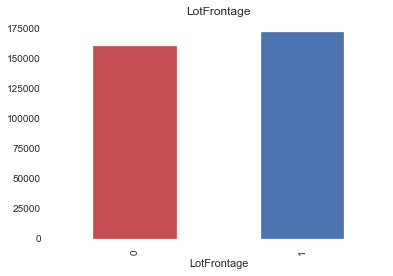

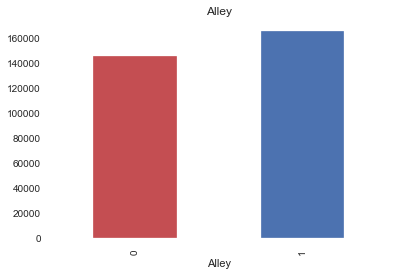

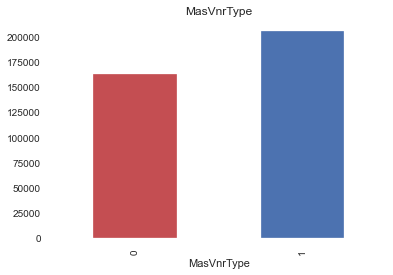

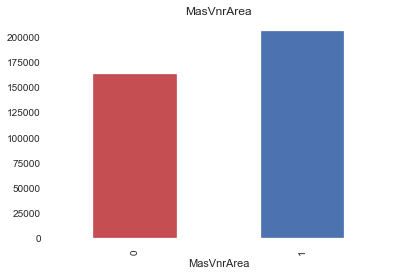

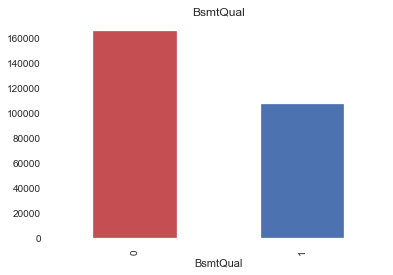

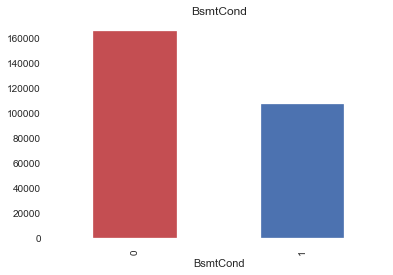

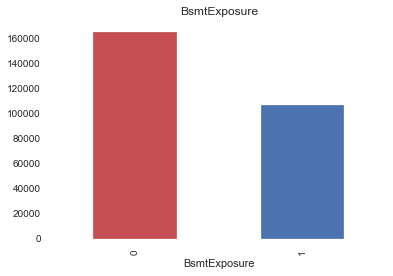

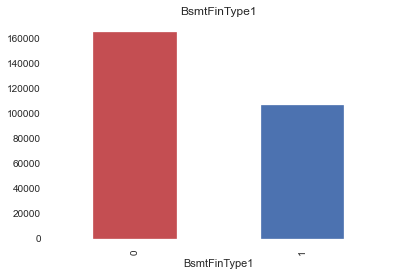

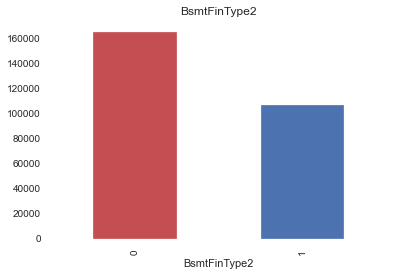

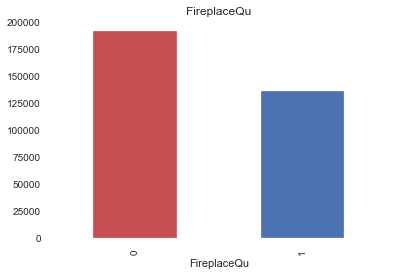

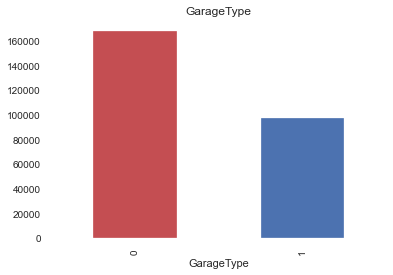

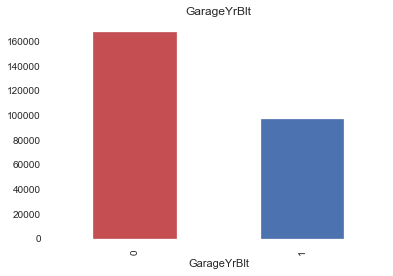

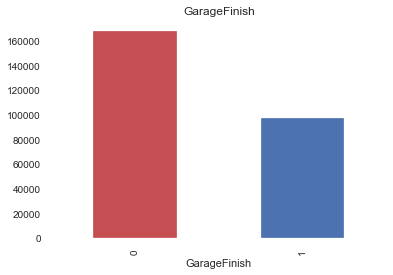

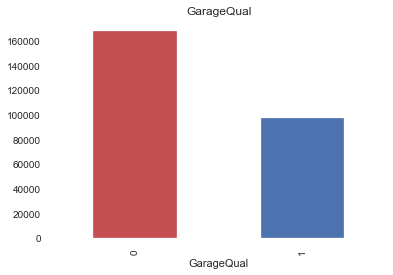

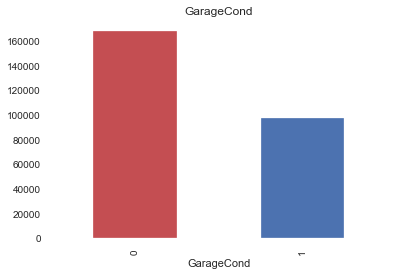

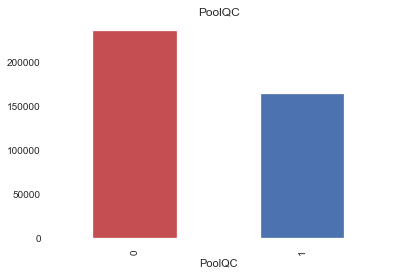

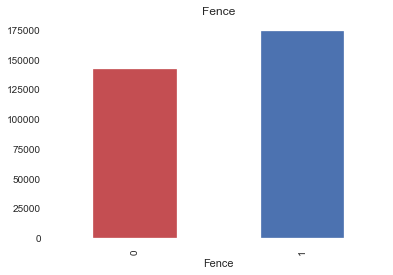

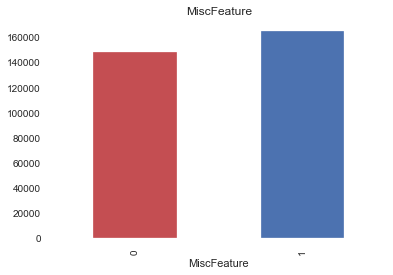

In [183]:
#check whether missing values have a significant relationship with target
data_copy = train.copy()
    
for i in nan_attributes:
    
    # store missing observation as 1 and zero otherwise
    data_copy[i] = np.where(data_copy[i].isnull(), 1, 0)
    
    # calculate the median SalePrice where data is missing & present
    data_copy.groupby(i)['SalePrice'].median().plot.bar(color=["r","b"],figsize=(6,4))
    plt.title(i)
    plt.show()

As we can observe in the visuals above, missing values also have an impact on the target variable. Hence, we need to impute these values with something meaningful.

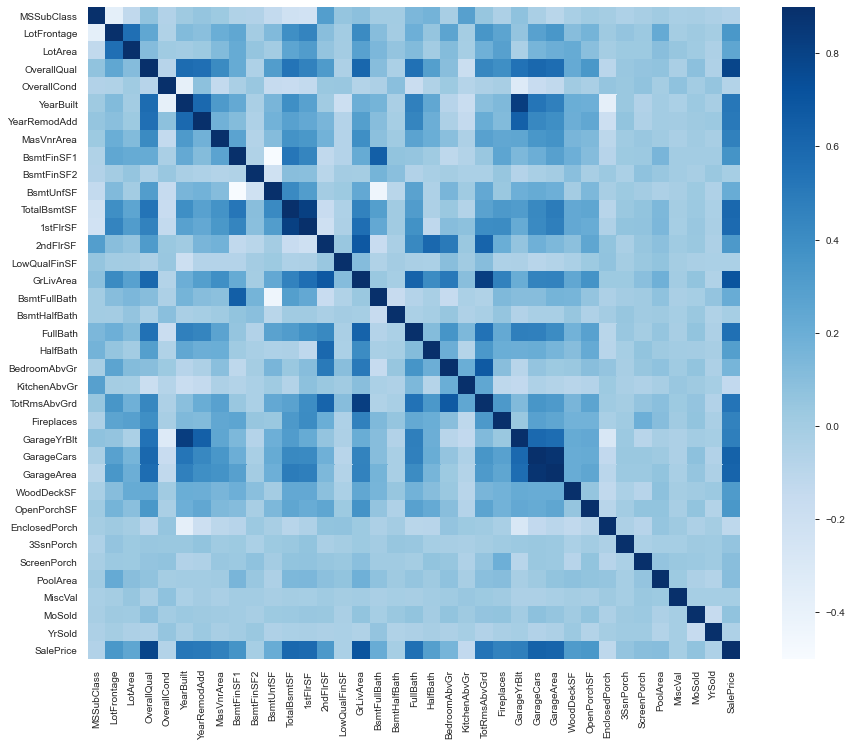

In [184]:
#checking correlation of features with each other
corr = train.corr()
plt.subplots(figsize=(15,12))
sns.heatmap(corr, vmax=0.9, cmap="Blues", square=True)

Text(0.5, 1.0, 'House Price vs YearSold')

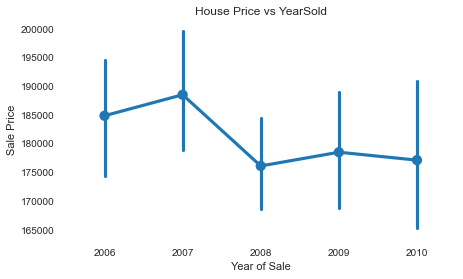

In [185]:
# checking relation between Sale Price and Year of Sale
plt.figure(figsize=(7,4))
sns.pointplot(train["YrSold"],train["SalePrice"])
plt.xlabel('Year of Sale')
plt.ylabel('Sale Price')
plt.title("House Price vs YearSold")

2007 saw the Prices touching an all-time high whereas 2008 also saw the lows.

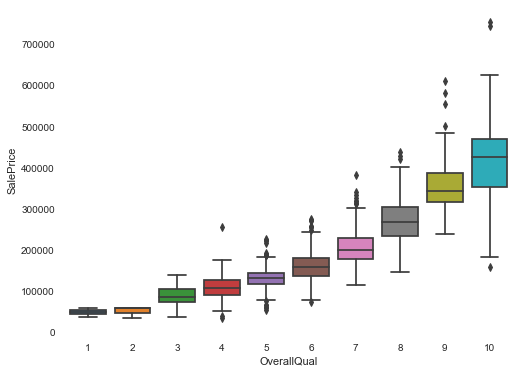

In [186]:
#Sales Price with respect to Overall Quality of the House
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=train['OverallQual'], y=train["SalePrice"])

Text(0, 0.5, 'SalePrice')

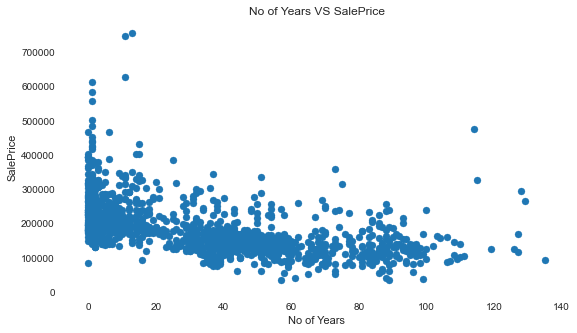

In [187]:
#Relation between Sale Price and No of years

data_copy["years_of_house_built"] = data_copy["YrSold"]-data_copy["YearBuilt"]

plt.figure(figsize=(9,5))
plt.scatter(data_copy["years_of_house_built"],data_copy["SalePrice"])
plt.title("No of Years VS SalePrice")
plt.xlabel("No of Years")
plt.ylabel("SalePrice")

We see a somewhat linear relation between House Age and Sale Price. The newer the house, the higher the price.

In [188]:
# taking discrete number features with less than 10 unique values 

discrete = [i for i in numerical_attributes if len(train[i].unique())<10]
discrete

['OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageCars',
 'PoolArea',
 'YrSold']

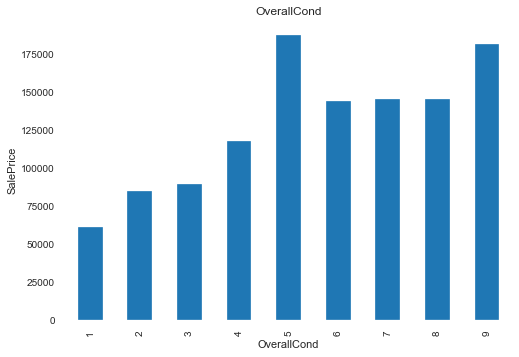

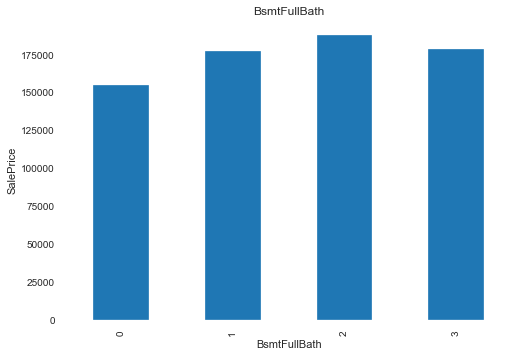

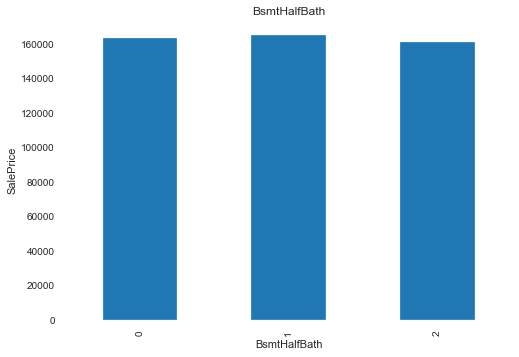

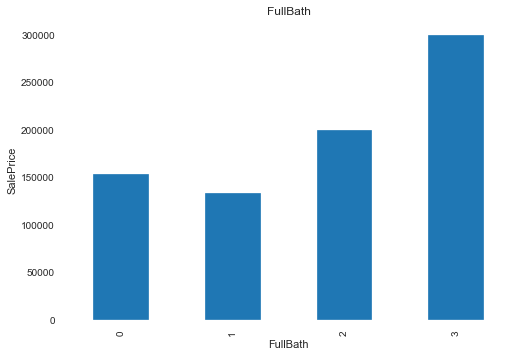

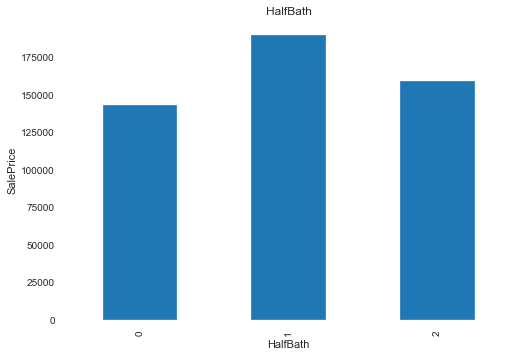

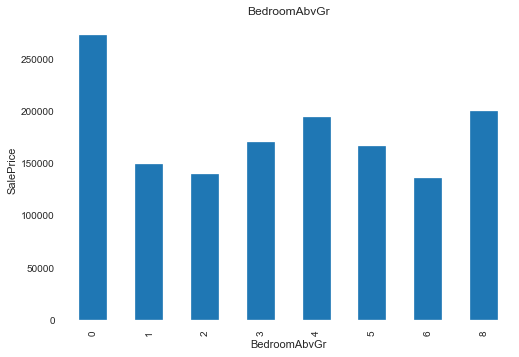

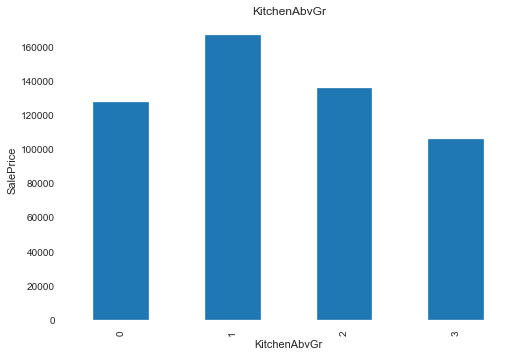

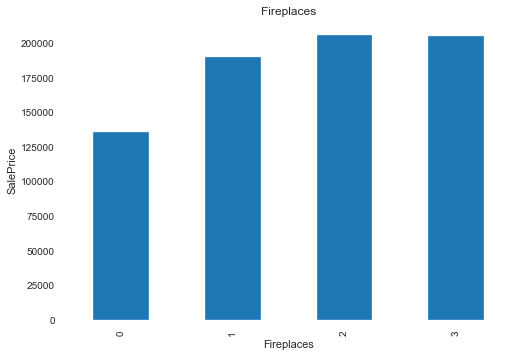

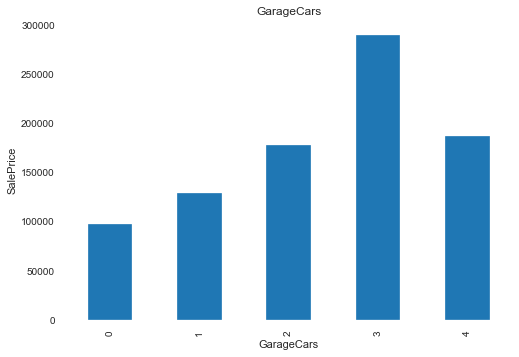

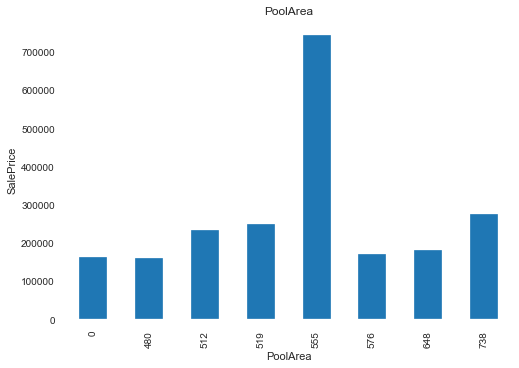

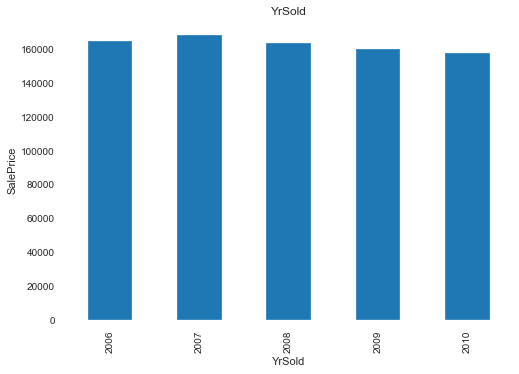

In [189]:
#Relation between Discrete attributes and Sale Price

for i in discrete:
    data_copy.groupby(i)['SalePrice'].median().plot.bar()
    plt.xlabel(i)
    plt.ylabel('SalePrice')
    plt.title(i)
    plt.show()

Observations:

With Overall Condition increasing from 1 to 9, Price of House also Increasing.

With 3 full Bathrooms, Sale Price goes Higher.

If fire places are 2 or 3, Price is high.

If garage capacity is three cars then price is high although more than 3 cars does not imply high price.

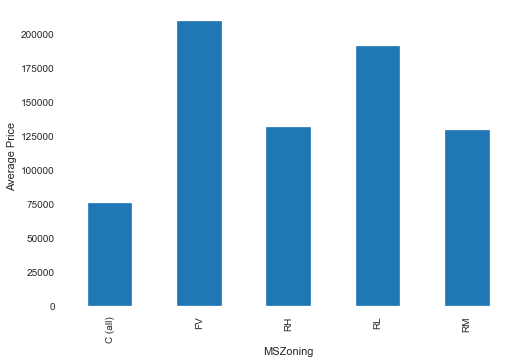

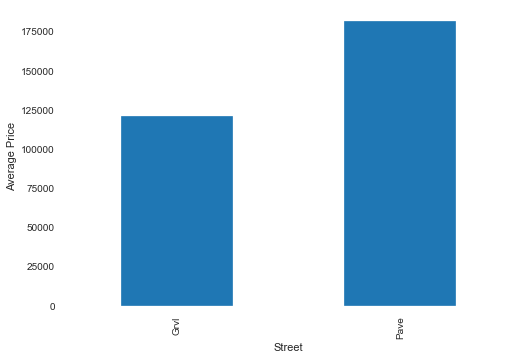

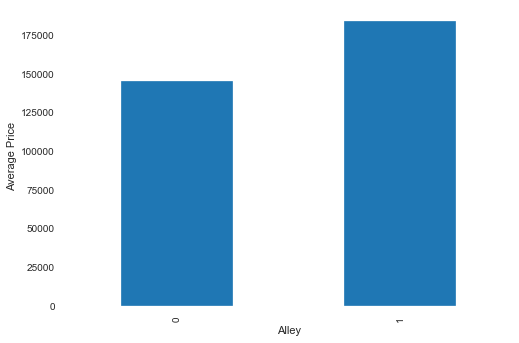

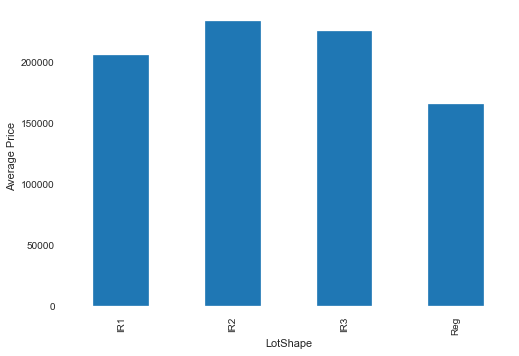

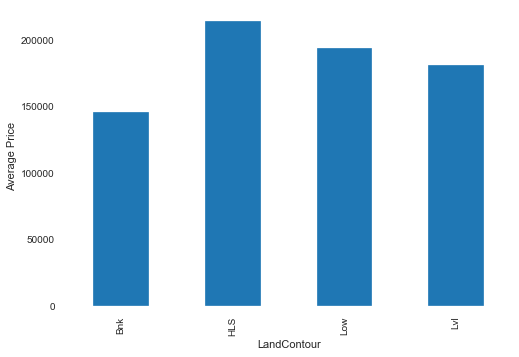

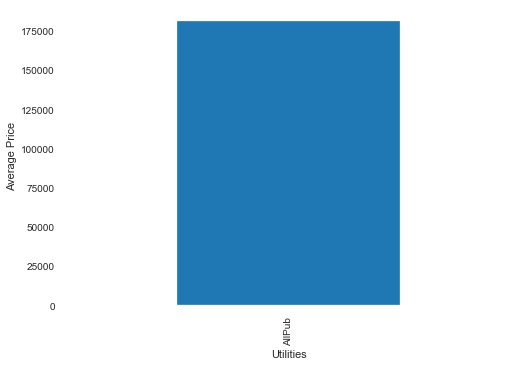

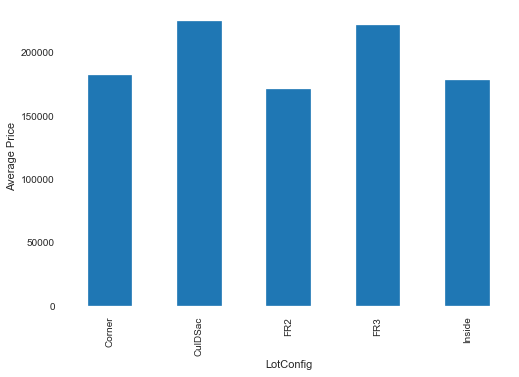

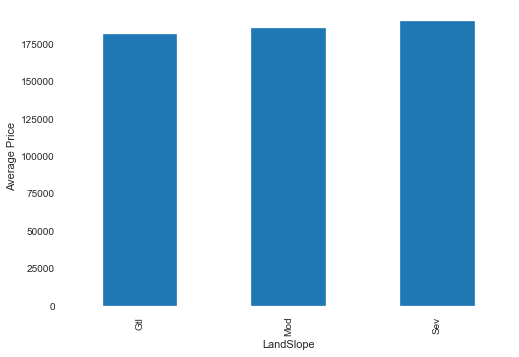

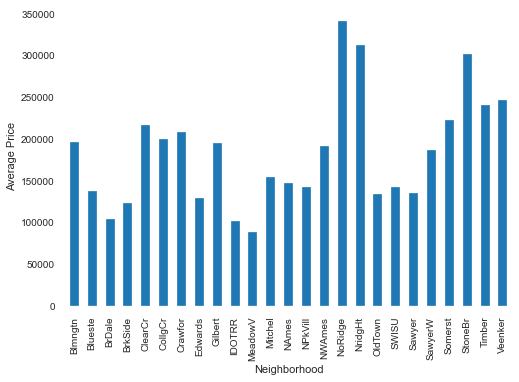

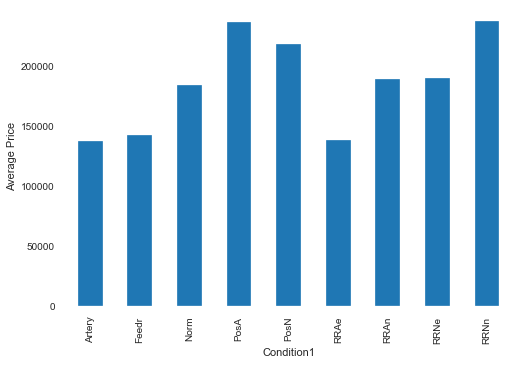

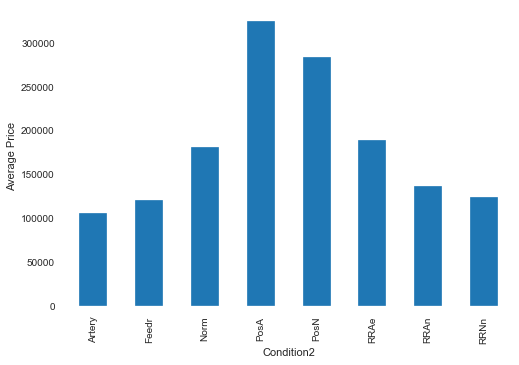

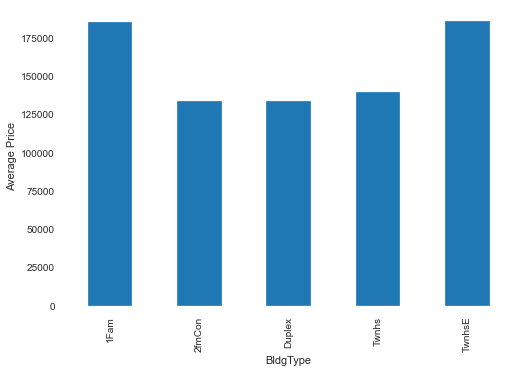

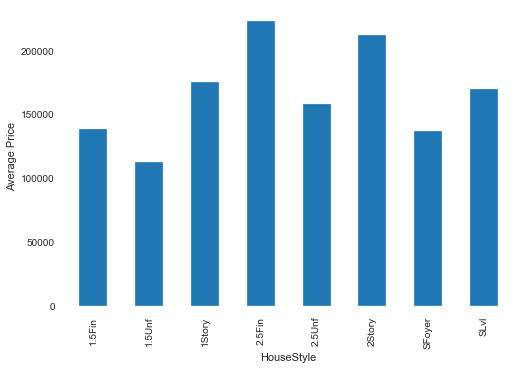

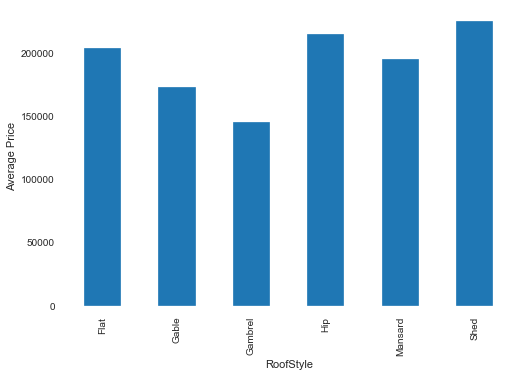

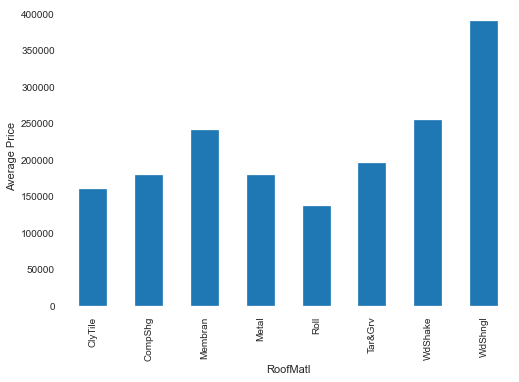

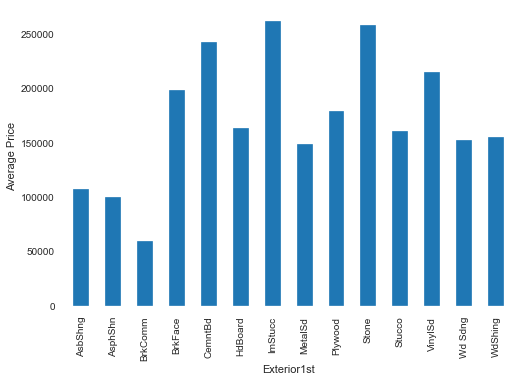

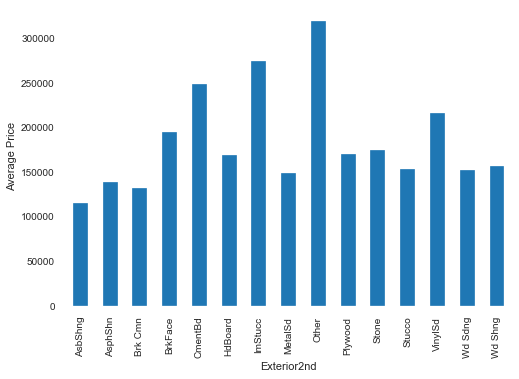

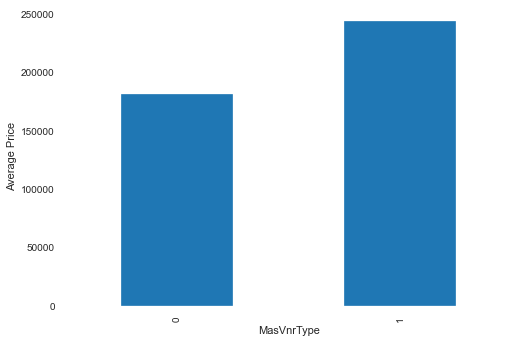

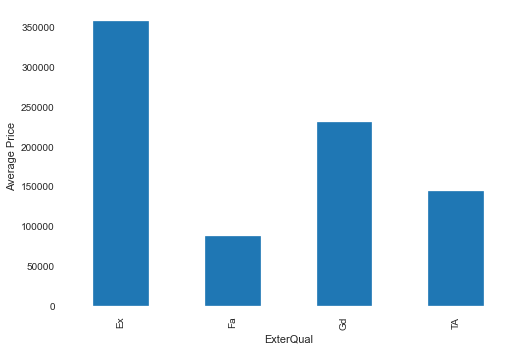

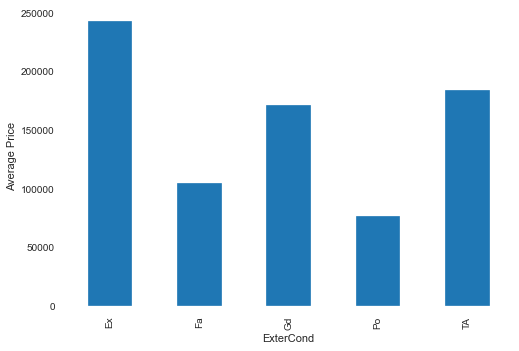

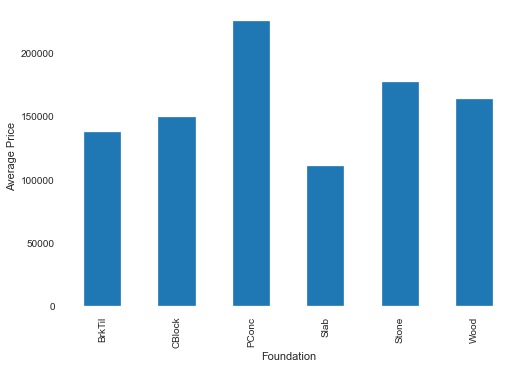

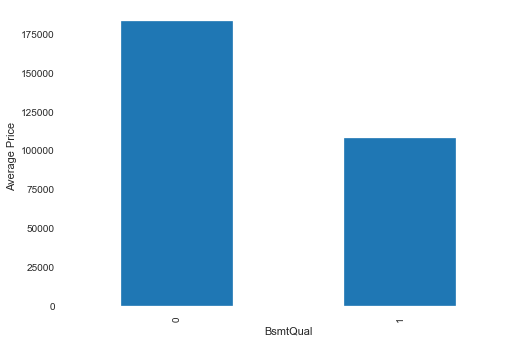

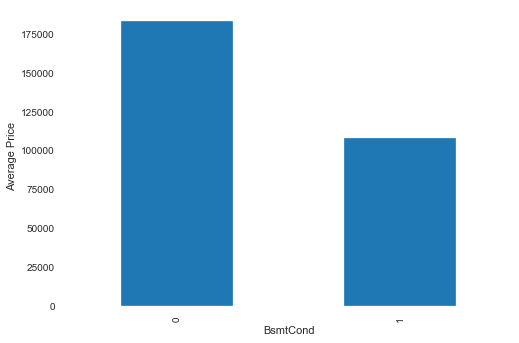

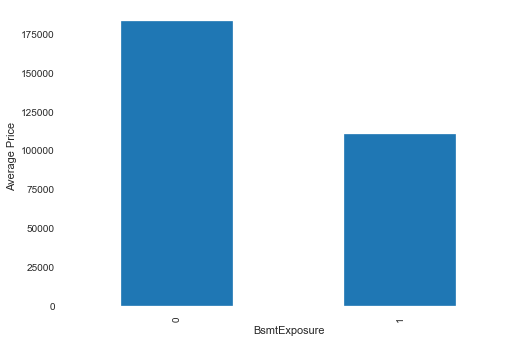

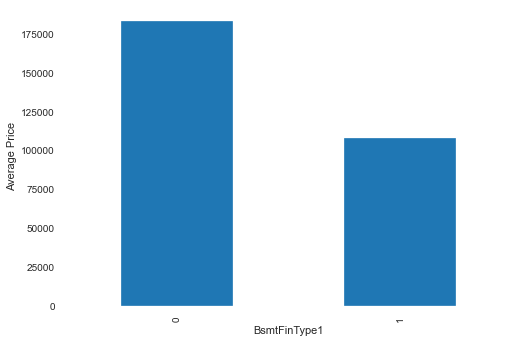

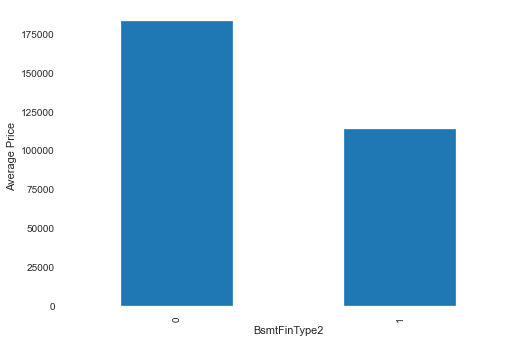

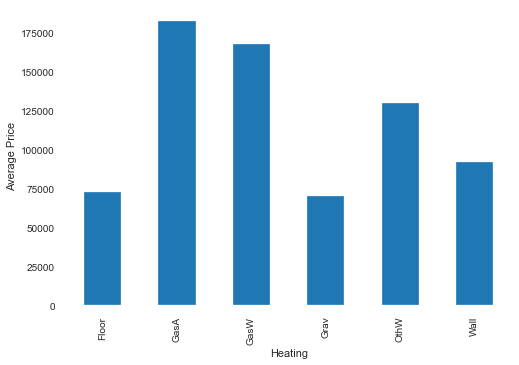

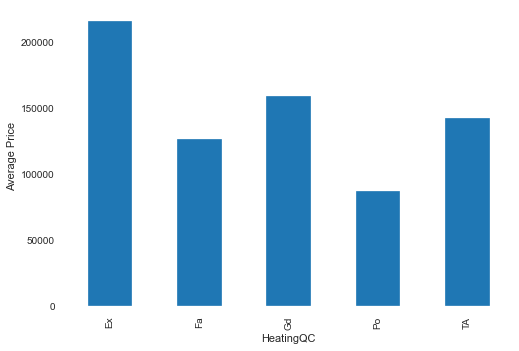

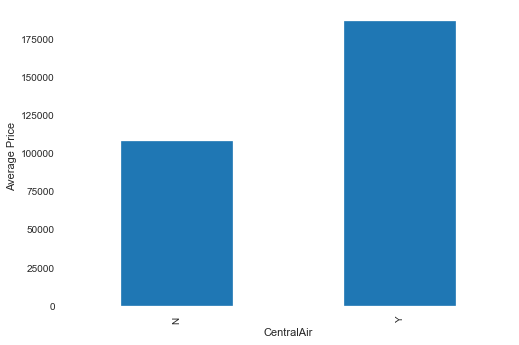

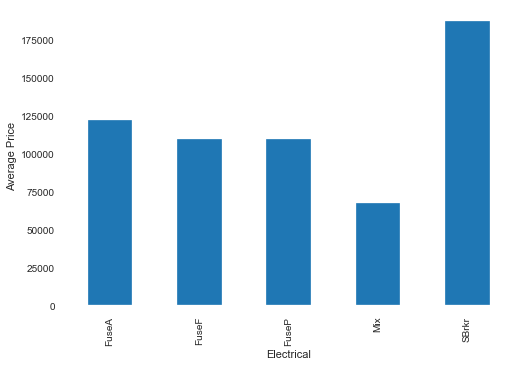

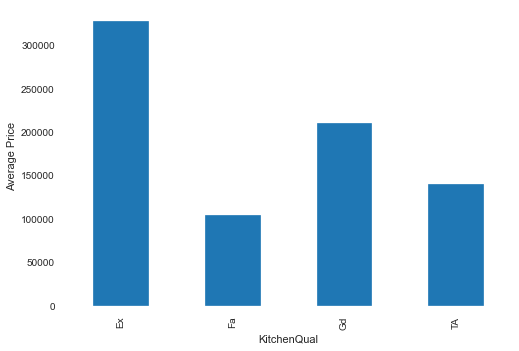

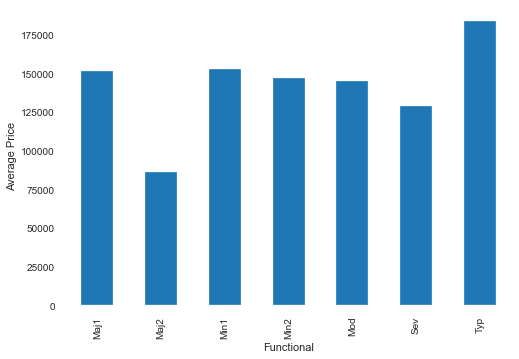

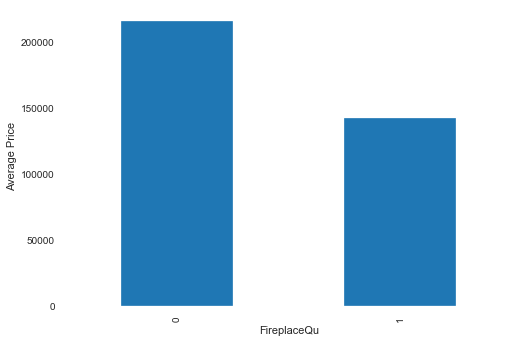

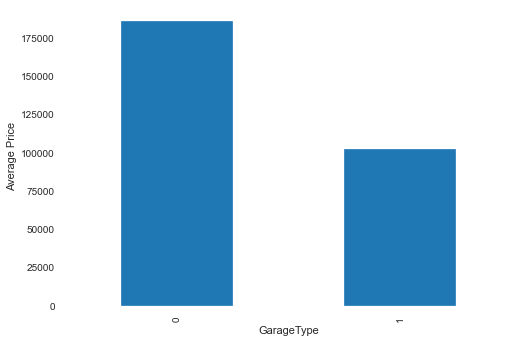

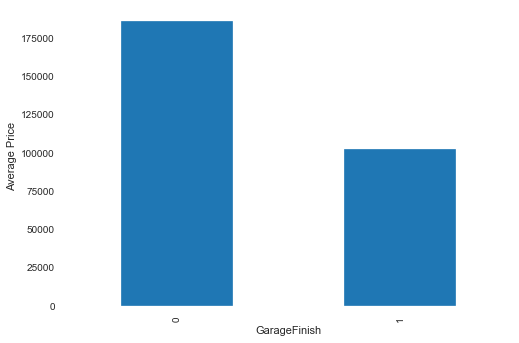

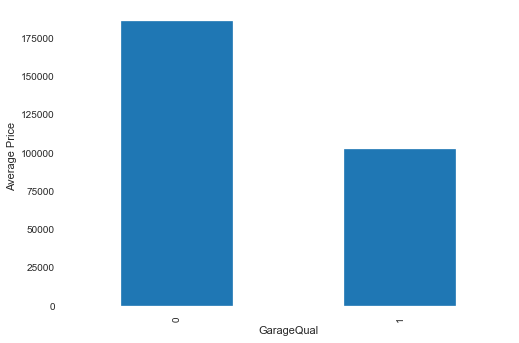

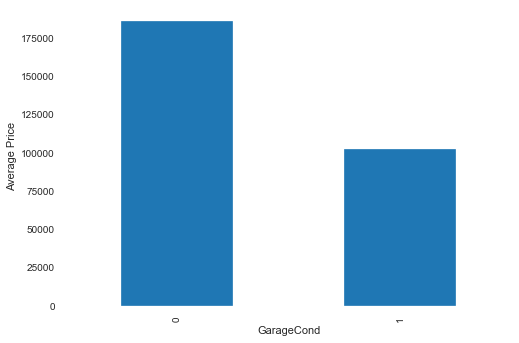

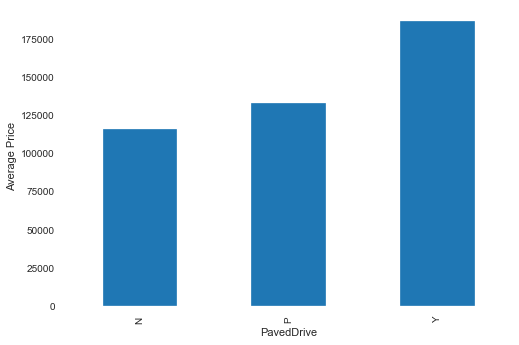

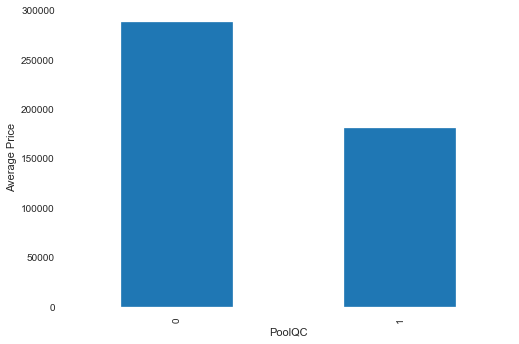

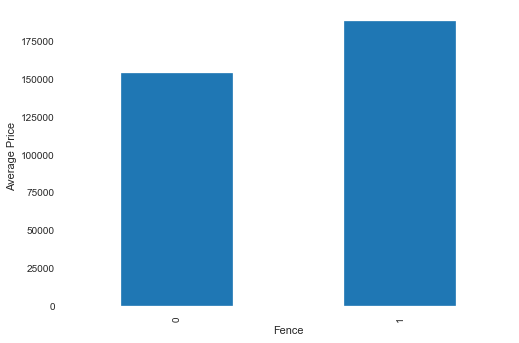

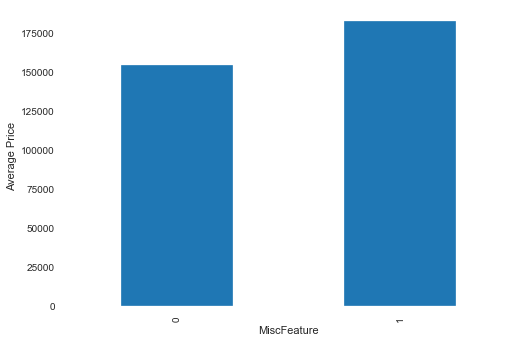

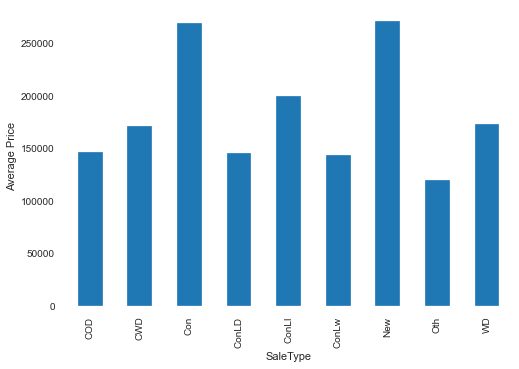

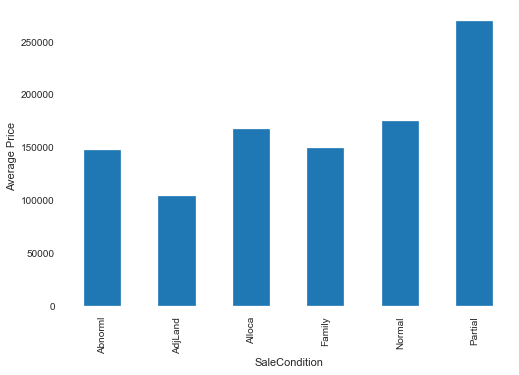

In [190]:
for i in categorical_attributes:
    data_copy.groupby(i)["SalePrice"].mean().plot.bar()
    plt.xlabel(i)
    plt.ylabel("Average Price")
    plt.show()

Observations:
    
Floating Village Residential Zoning shows Highest Selling Price as per zoning.

Paved street also translates to higher Sale Price.

If Stone is used in Masonry, Price is also high in comparison of Brick Common,Brick Face and Cinder Block.

If Exterior Quality is excellent than the House Price is also High. 

If Central Airconditioning available Price is High.

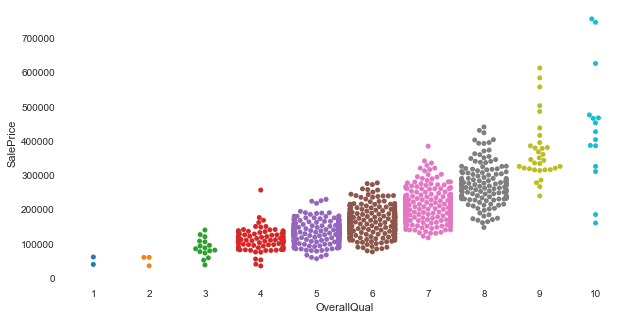

In [191]:
plt.figure(figsize=(10,5))
sns.swarmplot(train["OverallQual"],train["SalePrice"])

With respect to the Overall Quality, Prices are directly proportional.

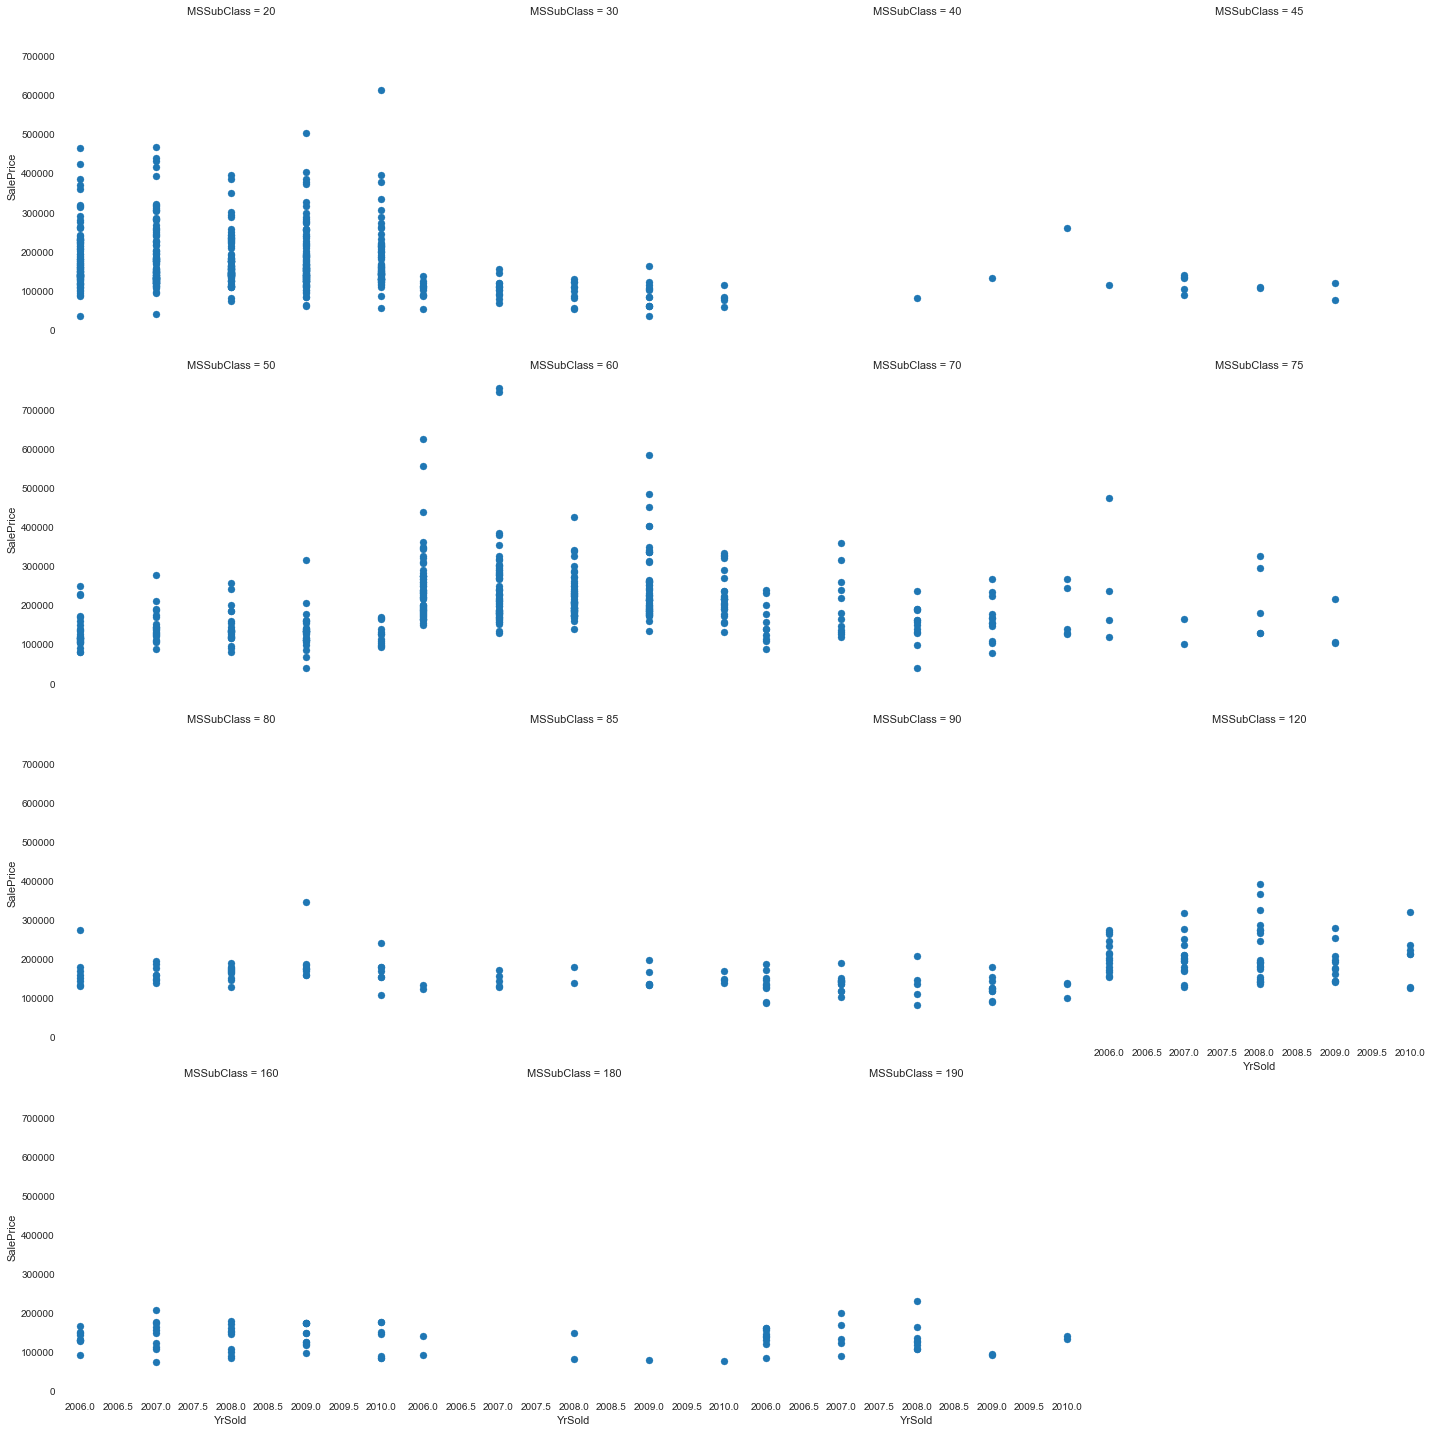

In [192]:
#Check Sale Price for MSSubClass year-wise
fig = sns.FacetGrid(train,col="MSSubClass",col_wrap=4,height=5)
fig.map(plt.scatter,"YrSold","SalePrice")

It is noticed that the SalesPrice is higher in MSSubclass 20 and 60 as compared to others.

# Merge Test and Train Datasets

In [193]:
df = pd.concat([train,test])
df

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0           120       RL          NaN     4928   Pave   NaN      IR1   
1            20       RL         95.0    15865   Pave   NaN      IR1   
2            60       RL         92.0     9920   Pave   NaN      IR1   
3            20       RL        105.0    11751   Pave   NaN      IR1   
4            20       RL          NaN    16635   Pave   NaN      IR1   
..          ...      ...          ...      ...    ...   ...      ...   
287          20       RL         78.0    10206   Pave   NaN      Reg   
288          20       RL         57.0     9245   Pave   NaN      IR2   
289          20       RL          NaN    11241   Pave   NaN      IR1   
290          50       RM         50.0     5000   Pave   NaN      Reg   
291         160       RM         21.0     1953   Pave   NaN      Reg   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0           Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1           Lvl    AllPub    Inside       Mod        NAmes       Norm   
2           Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3           Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4           Lvl    AllPub       FR2       Gtl       NWAmes       Norm   
..          ...       ...       ...       ...          ...        ...   
287         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
288         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
289         Lvl    AllPub   CulDSac       Gtl        NAmes       Norm   
290         Lvl    AllPub    Corner       Gtl      BrkSide      Feedr   
291         Lvl    AllPub    Inside       Gtl       BrDale       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0         Norm   TwnhsE     1Story            6            5       1976   
1         Norm     1Fam     1Story            8            6       1970   
2         Norm     1Fam     2Story            7            5       1996   
3         Norm     1Fam     1Story            6            6       1977   
4         Norm     1Fam     1Story            6            7       1977   
..         ...      ...        ...          ...          ...        ...   
287       Norm     1Fam     1Story            8            5       2007   
288       Norm     1Fam     1Story            5            5       1994   
289       Norm     1Fam     1Story            6            7       1970   
290       Norm     1Fam     1.5Fin            6            7       1947   
291       Norm    Twnhs     2Story            6            5       1973   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0            1976     Gable  CompShg     Plywood     Plywood       None   
1            1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2            1997     Gable  CompShg     MetalSd     MetalSd       None   
3            1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4            2000     Gable  CompShg     CemntBd     CmentBd      Stone   
..            ...       ...      ...         ...         ...        ...   
287          2007     Gable  CompShg     VinylSd     VinylSd      Stone   
288          1995     Gable  CompShg     VinylSd     VinylSd       None   
289          1970     Gable  CompShg     Wd Sdng     Wd Sdng    BrkFace   
290          1950     Gable  CompShg     CemntBd     CmentBd       None   
291          1973     Gable  CompShg     HdBoard     HdBoard    BrkFace   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0           0.0        TA        TA     CBlock       Gd       TA           No   
1           0.0        Gd        Gd      PConc       TA       Gd           Gd   
2           0.0        Gd        TA      PConc       Gd       TA           Av   
3         480.0        TA        TA     CBlock       Gd       TA           No   
4         126.0        Gd        TA     CBlock       Gd 

Null values check

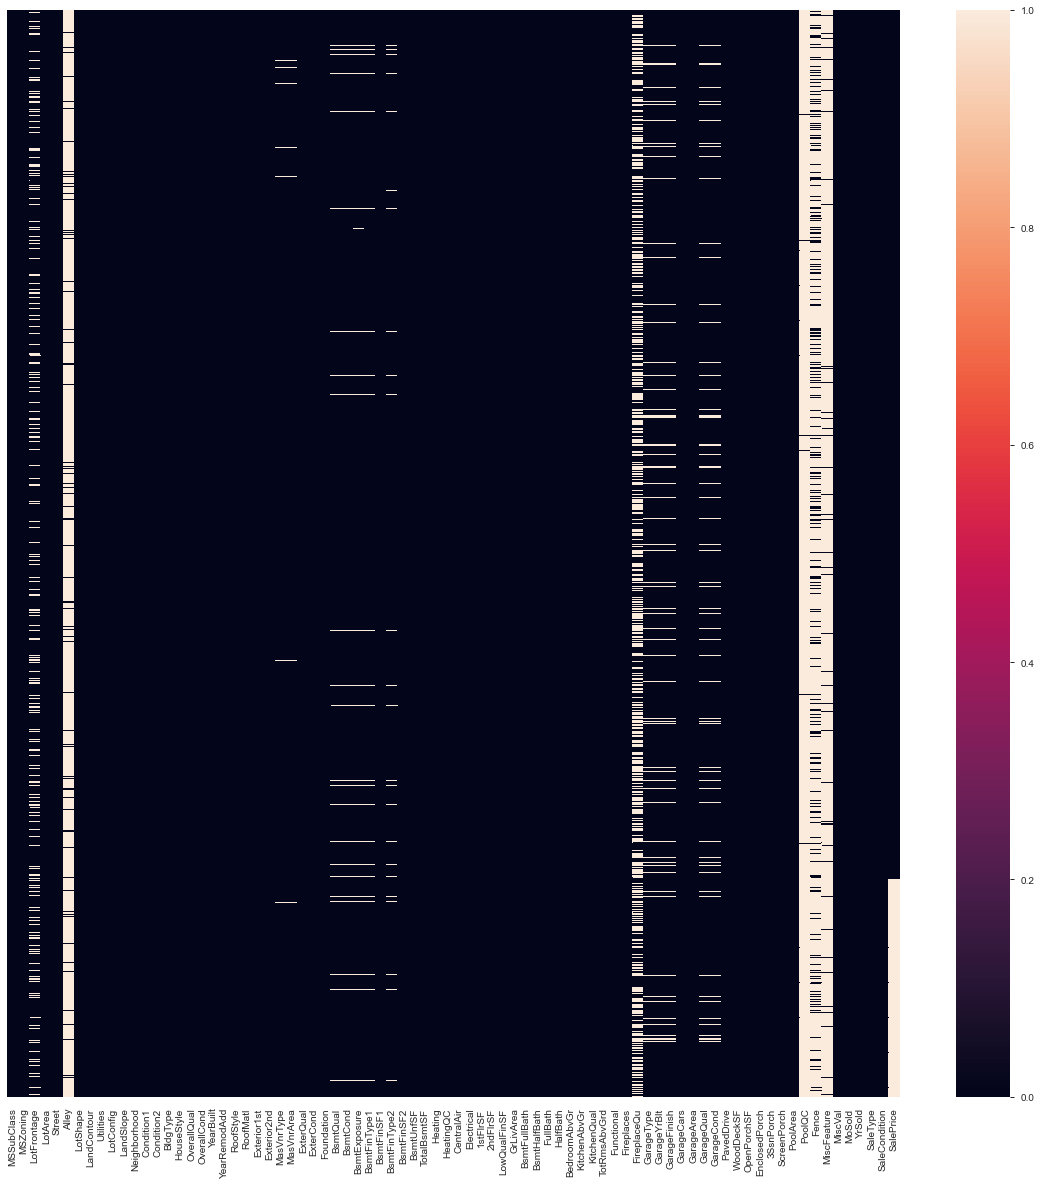

In [194]:
plt.figure(figsize=(20,20))
sns.heatmap(df.isnull(),yticklabels=False)

In [195]:
#check percentage of nan values

df_nan_values = [i for i in df.columns if df[i].isnull().sum()>=1]
df[df_nan_values].isnull().mean()

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
SalePrice       0.200000
dtype: float64

A few features in this dataset have null values exceeding 80%
Let us drop those columns.

In [196]:
df = df.drop(["Alley","PoolQC","Fence","MiscFeature"],axis=1)
df

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0           120       RL          NaN     4928   Pave      IR1         Lvl   
1            20       RL         95.0    15865   Pave      IR1         Lvl   
2            60       RL         92.0     9920   Pave      IR1         Lvl   
3            20       RL        105.0    11751   Pave      IR1         Lvl   
4            20       RL          NaN    16635   Pave      IR1         Lvl   
..          ...      ...          ...      ...    ...      ...         ...   
287          20       RL         78.0    10206   Pave      Reg         Lvl   
288          20       RL         57.0     9245   Pave      IR2         Lvl   
289          20       RL          NaN    11241   Pave      IR1         Lvl   
290          50       RM         50.0     5000   Pave      Reg         Lvl   
291         160       RM         21.0     1953   Pave      Reg         Lvl   

    Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0      AllPub    Inside       Gtl      NPkVill       Norm       Norm   TwnhsE   
1      AllPub    Inside       Mod        NAmes       Norm       Norm     1Fam   
2      AllPub   CulDSac       Gtl      NoRidge       Norm       Norm     1Fam   
3      AllPub    Inside       Gtl       NWAmes       Norm       Norm     1Fam   
4      AllPub       FR2       Gtl       NWAmes       Norm       Norm     1Fam   
..        ...       ...       ...          ...        ...        ...      ...   
287    AllPub    Inside       Gtl      Somerst       Norm       Norm     1Fam   
288    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
289    AllPub   CulDSac       Gtl        NAmes       Norm       Norm     1Fam   
290    AllPub    Corner       Gtl      BrkSide      Feedr       Norm     1Fam   
291    AllPub    Inside       Gtl       BrDale       Norm       Norm    Twnhs   

    HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0       1Story            6            5       1976          1976     Gable   
1       1Story            8            6       1970          1970      Flat   
2       2Story            7            5       1996          1997     Gable   
3       1Story            6            6       1977          1977       Hip   
4       1Story            6            7       1977          2000     Gable   
..         ...          ...          ...        ...           ...       ...   
287     1Story            8            5       2007          2007     Gable   
288     1Story            5            5       1994          1995     Gable   
289     1Story            6            7       1970          1970     Gable   
290     1.5Fin            6            7       1947          1950     Gable   
291     2Story            6            5       1973          1973     Gable   

    RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
0    CompShg     Plywood     Plywood       None         0.0        TA   
1    Tar&Grv     Wd Sdng     Wd Sdng       None         0.0        Gd   
2    CompShg     MetalSd     MetalSd       None         0.0        Gd   
3    CompShg     Plywood     Plywood    BrkFace       480.0        TA   
4    CompShg     CemntBd     CmentBd      Stone       126.0        Gd   
..       ...         ...         ...        ...         ...       ...   
287  CompShg     VinylSd     VinylSd      Stone       468.0        TA   
288  CompShg     VinylSd     VinylSd       None         0.0        TA   
289  CompShg     Wd Sdng     Wd Sdng    BrkFace       180.0        TA   
290  CompShg     CemntBd     CmentBd       None         0.0        TA   
291  CompShg     HdBoard     HdBoard    BrkFace       408.0        TA   

    ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0          TA     CBlock       Gd       TA           No          ALQ   
1          Gd      PConc       TA       Gd           Gd          ALQ   
2          TA      PConc       Gd       TA           

Let us impute values for the remaining missing feature values

In [197]:
df_nan_values

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SalePrice']

In [198]:
continuous_values = df.select_dtypes(include=["float64","int64"])
continuous_values

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0           120          NaN     4928            6            5       1976   
1            20         95.0    15865            8            6       1970   
2            60         92.0     9920            7            5       1996   
3            20        105.0    11751            6            6       1977   
4            20          NaN    16635            6            7       1977   
..          ...          ...      ...          ...          ...        ...   
287          20         78.0    10206            8            5       2007   
288          20         57.0     9245            5            5       1994   
289          20          NaN    11241            6            7       1970   
290          50         50.0     5000            6            7       1947   
291         160         21.0     1953            6            5       1973   

     YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0            1976         0.0         120           0        958         1078   
1            1970         0.0         351         823       1043         2217   
2            1997         0.0         862           0        255         1117   
3            1977       480.0         705           0       1139         1844   
4            2000       126.0        1246           0        356         1602   
..            ...         ...         ...         ...        ...          ...   
287          2007       468.0          33           0       1530         1563   
288          1995         0.0         686           0        304          990   
289          1970       180.0         578           0        426         1004   
290          1950         0.0         399           0        605         1004   
291          1973       408.0         309           0        174          483   

     1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0         958         0             0        958             0             0   
1        2217         0             0       2217             1             0   
2        1127       886             0       2013             1             0   
3        1844         0             0       1844             0             0   
4        1602         0             0       1602             0             1   
..        ...       ...           ...        ...           ...           ...   
287      1563         0             0       1563             0             0   
288       990         0             0        990             0             1   
289      1004         0             0       1004             1             0   
290      1004       660             0       1664             0             0   
291       483       504             0        987             0             0   

     FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0           2         0             2             1             5           1   
1           2         0             4             1             8           1   
2           2         1             3             1             8           1   
3           2         0             3             1             7           1   
4           2         0             3             1             8           1   
..        ...       ...           ...           ...           ...         ...   
287         2         0             3             1             6           1   
288         1         0             3             1             5           0   
289         1         0             2             1             5           1   
290         2         0             3             1             7           2   
291         1         1             2             1             5           0   

     GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0         1977.0           2         440           0          205   
1         1970.0       

In [199]:
continuous_nan_values = [i for i in continuous_values.columns if continuous_values[i].isnull().sum()>=1]
continuous_nan_values

['LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'SalePrice']

In [200]:
categorical_values = df.select_dtypes(include=["object"])
categorical_values

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0         RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
1         RL   Pave      IR1         Lvl    AllPub    Inside       Mod   
2         RL   Pave      IR1         Lvl    AllPub   CulDSac       Gtl   
3         RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
4         RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   
..       ...    ...      ...         ...       ...       ...       ...   
287       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
288       RL   Pave      IR2         Lvl    AllPub    Inside       Gtl   
289       RL   Pave      IR1         Lvl    AllPub   CulDSac       Gtl   
290       RM   Pave      Reg         Lvl    AllPub    Corner       Gtl   
291       RM   Pave      Reg         Lvl    AllPub    Inside       Gtl   

    Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0        NPkVill       Norm       Norm   TwnhsE     1Story     Gable  CompShg   
1          NAmes       Norm       Norm     1Fam     1Story      Flat  Tar&Grv   
2        NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   
3         NWAmes       Norm       Norm     1Fam     1Story       Hip  CompShg   
4         NWAmes       Norm       Norm     1Fam     1Story     Gable  CompShg   
..           ...        ...        ...      ...        ...       ...      ...   
287      Somerst       Norm       Norm     1Fam     1Story     Gable  CompShg   
288      CollgCr       Norm       Norm     1Fam     1Story     Gable  CompShg   
289        NAmes       Norm       Norm     1Fam     1Story     Gable  CompShg   
290      BrkSide      Feedr       Norm     1Fam     1.5Fin     Gable  CompShg   
291       BrDale       Norm       Norm    Twnhs     2Story     Gable  CompShg   

    Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation  \
0       Plywood     Plywood       None        TA        TA     CBlock   
1       Wd Sdng     Wd Sdng       None        Gd        Gd      PConc   
2       MetalSd     MetalSd       None        Gd        TA      PConc   
3       Plywood     Plywood    BrkFace        TA        TA     CBlock   
4       CemntBd     CmentBd      Stone        Gd        TA     CBlock   
..          ...         ...        ...       ...       ...        ...   
287     VinylSd     VinylSd      Stone        TA        TA      PConc   
288     VinylSd     VinylSd       None        TA        TA      PConc   
289     Wd Sdng     Wd Sdng    BrkFace        TA        TA     CBlock   
290     CemntBd     CmentBd       None        TA        Gd     CBlock   
291     HdBoard     HdBoard    BrkFace        TA        TA     CBlock   

    BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating  \
0         Gd       TA           No          ALQ          Unf    GasA   
1         TA       Gd           Gd          ALQ          Rec    GasA   
2         Gd       TA           Av          GLQ          Unf    GasA   
3         Gd       TA           No          BLQ          Unf    GasA   
4         Gd       TA           No          ALQ          Unf    GasA   
..       ...      ...          ...          ...          ...     ...   
287       Gd       TA           No          GLQ          Unf    GasA   
288       Gd       TA           No          GLQ          Unf    GasA   
289       TA       TA           No          ALQ          Unf    GasA   
290       TA       TA           No          ALQ          Unf    GasA   
291       TA       Fa           No          BLQ          Unf    GasA   

    HeatingQC CentralAir Electrical KitchenQual Functional FireplaceQu  \
0          TA          Y      SBrkr          TA        Typ          TA   
1          Ex          Y      SBrkr          Gd        Typ          TA   
2          Ex          Y      SBrkr          TA        Typ          TA   
3          Ex          Y      SBrkr          TA        Typ          TA   
4          Gd          Y      

In [201]:
# find null values in categorical values for each attribute
categorical_nan_values = [i for i in categorical_values.columns if categorical_values[i].isnull().sum()>=1]
categorical_nan_values

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [202]:
# Percentage of null values in categorical values for each attribute

df[categorical_nan_values].isnull().mean()

MasVnrType      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
dtype: float64

We see FireplaceQual having 47% of null values. One reason could be that not all houses have fireplaces. So, to fill these nan values we will need to create a new category.

In [203]:
#MasVnrType feature
df[df["MasVnrType"].isna()]

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
68           20       RL          NaN    32668   Pave      IR1         Lvl   
78           20       RL        107.0    13891   Pave      Reg         Lvl   
99           60       FV         65.0     8125   Pave      Reg         Lvl   
185          20       FV         95.0    11639   Pave      Reg         Lvl   
224         120       FV         35.0     4274   Pave      IR1         Lvl   
367          60       RL         75.0     9473   Pave      Reg         Lvl   
874          60       RL          NaN     7851   Pave      Reg         Lvl   
31           20       RL         67.0    10083   Pave      Reg         Lvl   

    Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
68     AllPub   CulDSac       Gtl      Crawfor       Norm       Norm     1Fam   
78     AllPub    Inside       Gtl      NridgHt       Norm       Norm     1Fam   
99     AllPub    Inside       Gtl      Somerst       Norm       Norm     1Fam   
185    AllPub    Corner       Gtl      Somerst       Norm       Norm     1Fam   
224    AllPub    Inside       Gtl      Somerst       Norm       Norm   TwnhsE   
367    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
874    AllPub    Inside       Gtl      Gilbert       Norm       Norm     1Fam   
31     AllPub    Inside       Gtl      SawyerW       Norm       Norm     1Fam   

    HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
68      1Story            6            3       1957          1975       Hip   
78      1Story           10            5       2006          2006     Gable   
99      2Story            7            6       2007          2007     Gable   
185     1Story            7            5       2007          2008     Gable   
224     1Story            7            5       2006          2007     Gable   
367     2Story            8            5       2002          2002     Gable   
874     2Story            6            5       2002          2002     Gable   
31      1Story            7            5       2003          2003     Gable   

    RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
68   CompShg     Wd Sdng       Stone        NaN         NaN        Gd   
78   CompShg     VinylSd     VinylSd        NaN         NaN        Ex   
99   CompShg     CemntBd     CmentBd        NaN         NaN        Gd   
185  CompShg     CemntBd     CmentBd        NaN         NaN        Gd   
224  CompShg     VinylSd     VinylSd        NaN         NaN        Gd   
367  CompShg     VinylSd     VinylSd        NaN         NaN        Gd   
874  CompShg     VinylSd     VinylSd        NaN         NaN        Gd   
31   CompShg     VinylSd     VinylSd        NaN         NaN        Gd   

    ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
68         TA      PConc       TA       TA           No          Rec   
78         TA      PConc       Ex       Gd           Gd          GLQ   
99         TA      PConc       Gd       TA           No          Unf   
185        TA      PConc       Gd       TA           No          Unf   
224        TA      PConc       Gd       TA           No          GLQ   
367        TA      PConc       Gd       TA           No          GLQ   
874        TA      PConc       Gd       TA           No          GLQ   
31         TA      PConc       Gd       TA           No          GLQ   

     BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  \
68         1219          Unf           0        816         2035    GasA   
78         1386          Unf           0        690         2076    GasA   
99            0          Unf           0        813          813    GasA   
185           0          Unf           0       1428         1428    GasA   
224        1106          Unf           0        135         1241    GasA   
367         804          Unf           0        324         1128    GasA   
874         625      

In [204]:
df["MasVnrType"].isna().sum()

8

In [205]:
df["MasVnrArea"].isna().sum()

8

In [206]:
# fill missing value in MasVnrType with new category.
df["MasVnrType"] = df["MasVnrType"].fillna("None")

In [207]:
# fill missing value in MasVnrArea by 0.
df["MasVnrArea"] = df["MasVnrArea"].fillna(0)

In [208]:
# fill nan in FireplaceQu feature with No Fireplace
df["FireplaceQu"] = df["FireplaceQu"].fillna("No Fireplace")

In [209]:
#Similarly, we will check for the rest of the attributes
#categorical basement features

df["BsmtQual"] = df["BsmtQual"].fillna("No Basement")
df["BsmtCond"] = df["BsmtCond"].fillna("No Basement")
df["BsmtExposure"] = df["BsmtExposure"].fillna("No Basement")
df["BsmtFinType1"] = df["BsmtFinType1"].fillna("No Basement")
df["BsmtFinType2"] = df["BsmtFinType2"].fillna("No Basement")

In [210]:
#continuous basement features
df["BsmtFinSF1"] = df["BsmtFinSF1"].fillna(0)
df["BsmtFinSF2"] = df["BsmtFinSF2"].fillna(0)
df["BsmtUnfSF"] = df["BsmtUnfSF"].fillna(0)
df["TotalBsmtSF"] = df["TotalBsmtSF"].fillna(0)

In [211]:
# fill na value in BsmtHalfBath by 0.
df["BsmtHalfBath"] = df["BsmtHalfBath"].fillna(0)

In [212]:
# fill na value in BsmtFullBath by 0.
df["BsmtFullBath"] = df["BsmtFullBath"].fillna(0)

In [213]:
# fill na value in Electrical by Mode.
df["Electrical"] = df["Electrical"].fillna("SBrkr")

In [214]:
# fill na value in KitchenQual by Mode.
df["KitchenQual"] = df["KitchenQual"].fillna("TA")

In [215]:
# fill na value in KitchenQual by Mode.
df["Functional"] = df["Functional"].fillna("Typ")

In [216]:
#Since not all houses have garage, fill nan with No Garage category

df["GarageType"] = df["GarageType"].fillna("No Garage")
df["GarageFinish"] = df["GarageFinish"].fillna("No Garage")
df["GarageCond"] = df["GarageCond"].fillna("No Garage")
df["GarageQual"] = df["GarageQual"].fillna("No Garage")

In [217]:
#conitnuous garage feature
df["GarageYrBlt"]=df["GarageYrBlt"].fillna(0)
df["GarageArea"]=df["GarageArea"].fillna(0)

In [218]:
df["GarageCars"] = df["GarageCars"].fillna(0)

In [219]:
# fill nan value in MSZoning by Mode.
df["MSZoning"] = df["MSZoning"].fillna("RL")

In [220]:
# fill na value in Utilities by Mode.
df["Utilities"] = df["Utilities"].fillna("AllPub")

In [221]:
df["Exterior1st"] = df["Exterior1st"].fillna("VinylSd")

In [222]:
df["Exterior2nd"] = df["Exterior2nd"].fillna("VinylSd")

In [223]:
# fill na value in Exterior2nd by Mode.

df["SaleType"] = df["SaleType"].fillna("WD")

In [224]:
#check if all categorical nan values handled
df[categorical_nan_values].isnull().sum()

MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [225]:
# fill missing value in YearRemodAdd by median value.
median_value=df["YearRemodAdd"].median()
df["YearRemodAdd"].fillna(median_value,inplace=True)

In [227]:
df.shape

(1460, 76)

In [228]:
## Replacing the numerical Missing Values with median due to outliers

for i in continuous_nan_values:
    median_value=df[i].median()
    ## create a new feature to capture nan values
    df[i+'nan']=np.where(df[i].isnull(),1,0)
    df[i].fillna(median_value,inplace=True)
   
df[continuous_nan_values].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
SalePrice      0
dtype: int64

In [230]:
## Modify Temporal Variables (Date Time Variables)

for i in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
       
    df[i]=df['YrSold']-df[i]

# Handling Skewed Features

In [232]:
# Fetch all numeric features
numeric_feats = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = []
for i in df.columns:
    if df[i].dtype in numeric_feats:
        numeric.append(i)

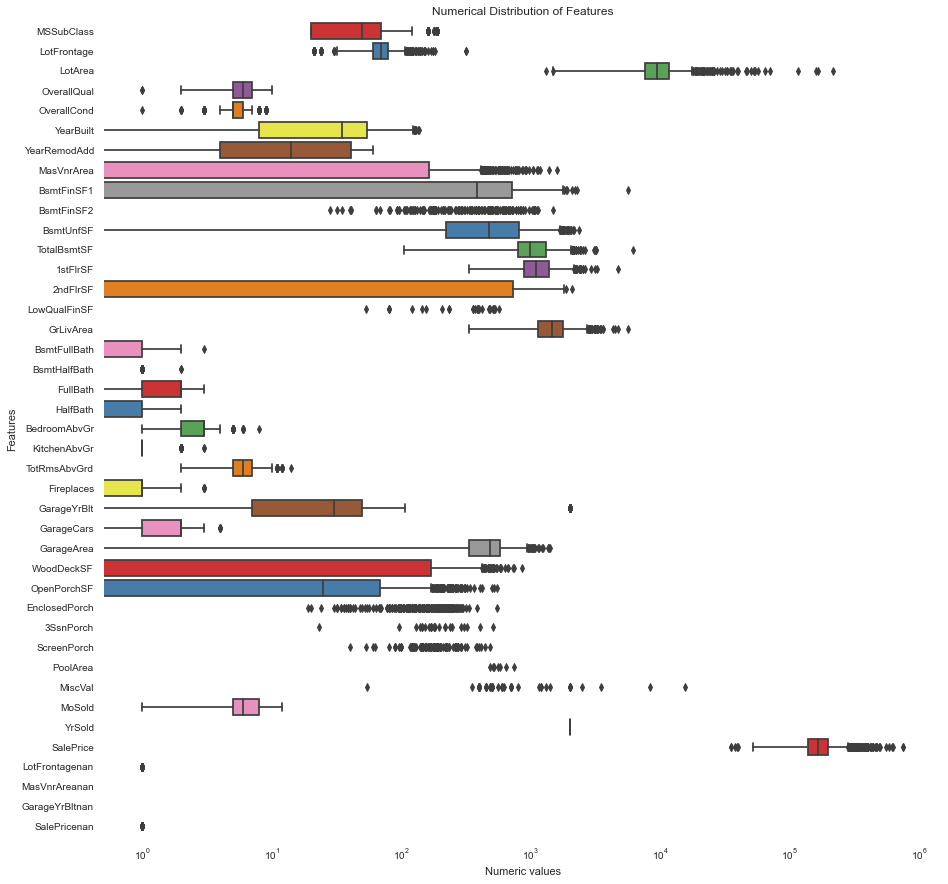

In [233]:
# Create box plots for all numeric features
sns.set_style("white")
f, ax = plt.subplots(figsize=(15,15))
ax.set_xscale("log")
ax = sns.boxplot(data=df[numeric] , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Features")
ax.set(xlabel="Numeric values")
ax.set(title="Numerical Distribution of Features")
sns.despine(trim=True, left=True)

In [234]:
numeric_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

for feature in numeric_features:
    df[feature]=np.log(df[feature])

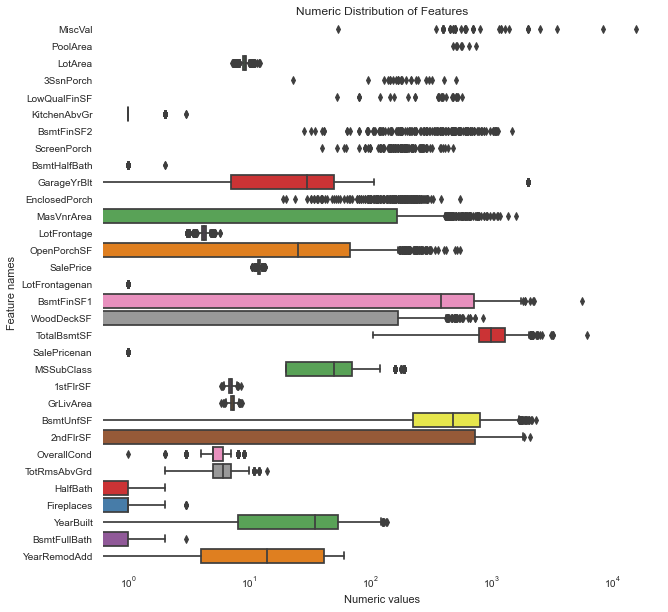

In [236]:
# Re-checking all the skewed values
sns.set_style("white")
f, ax = plt.subplots(figsize=(10, 10))
ax.set_xscale("log")
ax = sns.boxplot(data=df[skew_index] , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

The features look fairly normally distributed now.

# Encoding Categorical Features

In [237]:
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']

for feature in categorical_features:
    labels_ordered=df.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df[feature]=df[feature].map(labels_ordered)

In [238]:
df.head(10)

MSSubClass  MSZoning  LotFrontage   LotArea  Street  LotShape  LandContour  \
0         120         3     4.234107  8.502689       1         1            1   
1          20         3     4.553877  9.671871       1         1            1   
2          60         3     4.521789  9.202308       1         1            1   
3          20         3     4.653960  9.371694       1         1            1   
4          20         3     4.234107  9.719264       1         1            1   
5          60         3     4.060443  9.550662       1         1            1   
6          20         3     4.234107  9.336180       1         1            1   
7          20         3     4.477337  9.482274       1         0            1   
8          20         3     4.248495  9.123693       1         0            1   
9          50         3     4.382027  9.045466       1         0            1   

   Utilities  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0          1          1          1             9           3           4   
1          1          1          0            10           3           4   
2          1          4          1            24           3           4   
3          1          1          1            13           3           4   
4          1          0          1            13           3           4   
5          1          1          1            14           3           4   
6          1          1          1             7           3           4   
7          1          2          1             7           3           4   
8          1          2          1             4           1           4   
9          1          1          1            10           3           4   

   BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         4           4            6            5         31            31   
1         3           4            8            6         37            37   
2         3           6            7            5         11            10   
3         3           4            6            6         33            33   
4         3           4            6            7         32             9   
5         3           6            7            5          0             0   
6         3           4            5            6         53            14   
7         3           4            5            4         49             6   
8         3           4            5            7         42            42   
9         3           2            5            5         61            58   

   RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  \
0          1         2            9            8           1         0.0   
1          4         4            3            4           1         0.0   
2          1         2            4            5           1         0.0   
3          3         2            9            8           2       480.0   
4          1         2           12           13           3       126.0   
5          1         2           11           12           1         0.0   
6          3         2            3            4           2       180.0   
7          1         2            3            4           0        67.0   
8          3         2            4            5           1         0.0   
9          1         2            4            5           1         0.0   

   ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  \
0          1          3           2         3         3             1   
1          2          2           5         2         4             4   
2          2          3           5         3         3             3   
3          1          3           2         3         3             1   
4          2          3           2         3         3             1   
5          2          3           5         3         3             3   
6          1          3           2         3         3            

# Split Train and Test data

In [239]:
train = df.iloc[:1168,:]
train

MSSubClass  MSZoning  LotFrontage   LotArea  Street  LotShape  \
0            120         3     4.234107  8.502689       1         1   
1             20         3     4.553877  9.671871       1         1   
2             60         3     4.521789  9.202308       1         1   
3             20         3     4.653960  9.371694       1         1   
4             20         3     4.234107  9.719264       1         1   
...          ...       ...          ...       ...     ...       ...   
1163          20         3     4.234107  9.192075       1         1   
1164          20         3     4.204693  9.079890       1         0   
1165         160         3     3.178054  7.731931       1         0   
1166          70         0     3.912023  9.047821       1         0   
1167          60         3     4.234107  8.969669       1         1   

      LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0               1          1          1          1             9           3   
1               1          1          1          0            10           3   
2               1          1          4          1            24           3   
3               1          1          1          1            13           3   
4               1          1          0          1            13           3   
...           ...        ...        ...        ...           ...         ...   
1163            1          1          1          1             7           3   
1164            1          1          1          1             4           1   
1165            1          1          0          1             9           3   
1166            1          1          1          1             0           1   
1167            1          1          1          1            14           3   

      Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0              4         4           4            6            5         31   
1              4         3           4            8            6         37   
2              4         3           6            7            5         11   
3              4         3           4            6            6         33   
4              4         3           4            6            7         32   
...          ...       ...         ...          ...          ...        ...   
1163           4         3           4            5            5         43   
1164           4         3           4            4            5         60   
1165           4         2           6            6            6         33   
1166           4         3           6            4            4         88   
1167           4         3           6            6            5          4   

      YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0               31          1         2            9            8           1   
1               37          4         4            3            4           1   
2               10          1         2            4            5           1   
3               33          3         2            9            8           2   
4                9          1         2           12           13           3   
...            ...        ...       ...          ...          ...         ...   
1163            43          1         2            4            5           2   
1164             6          1         2           11           12           1   
1165            33          1         2            9            2           1   
1166            58          0         2           10           11           1   
1167             3          1         2           11           12           1   

      MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0            0.0          1          3           2         3         3   
1            0.0          2          2           5         2         4   
2            0.0          2          3          

In [240]:
test= df.iloc[1168:,:]
test

MSSubClass  MSZoning  LotFrontage   LotArea  Street  LotShape  \
0            20         3     4.454347  9.557964       1         1   
1           120         3     4.234107  8.668024       1         1   
2            20         3     4.234107  9.379070       1         0   
3            70         3     4.317488  9.392662       1         0   
4            60         3     4.454347  9.588640       1         1   
..          ...       ...          ...       ...     ...       ...   
287          20         3     4.356709  9.230731       1         0   
288          20         3     4.043051  9.131838       1         3   
289          20         3     4.234107  9.327323       1         1   
290          50         2     3.912023  8.517193       1         0   
291         160         2     3.044522  7.577122       1         0   

     LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0              3          1          2          1            22           3   
1              1          1          4          1            22           3   
2              1          1          1          1            15           3   
3              0          1          1          1            17           3   
4              1          1          4          1            19           1   
..           ...        ...        ...        ...           ...         ...   
287            1          1          1          1            19           3   
288            1          1          1          1            15           3   
289            1          1          4          1            10           3   
290            1          1          2          1             3           1   
291            1          1          1          1             2           3   

     Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0             4         3           4            9            5          2   
1             4         4           4            8            5         25   
2             4         3           4            8            5          8   
3             4         3           6            7            7         68   
4             4         3           6            6            5          1   
..          ...       ...         ...          ...          ...        ...   
287           4         3           4            8            5          1   
288           4         3           4            5            5         14   
289           4         3           4            6            7         40   
290           4         3           2            6            7         59   
291           4         2           6            6            5         33   

     YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0               1          3         2           11           12           3   
1              25          1         2            7            7           1   
2               8          3         2           11           12           1   
3              59          1         2            4            5           1   
4               1          1         2           11           12           3   
..            ...        ...       ...          ...          ...         ...   
287             1          1         2           11           12           3   
288            13          1         2           11           12           1   
289            40          1         2            3            4           2   
290            56          1         2           12           13           1   
291            33          1         2            7            7           2   

     MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0         200.0          2          3           5         4         3   
1           0.0          2          3           2         3         3   
2           0.0          2          3           5         3         3   
3           0.0          

In [241]:
#Split Independent features and Dependent features from train dataset.
df_x = train.drop(["SalePrice"],axis=1)
df_y = train["SalePrice"]

In [242]:
test= test.drop(["SalePrice"],axis=1)
test

MSSubClass  MSZoning  LotFrontage   LotArea  Street  LotShape  \
0            20         3     4.454347  9.557964       1         1   
1           120         3     4.234107  8.668024       1         1   
2            20         3     4.234107  9.379070       1         0   
3            70         3     4.317488  9.392662       1         0   
4            60         3     4.454347  9.588640       1         1   
..          ...       ...          ...       ...     ...       ...   
287          20         3     4.356709  9.230731       1         0   
288          20         3     4.043051  9.131838       1         3   
289          20         3     4.234107  9.327323       1         1   
290          50         2     3.912023  8.517193       1         0   
291         160         2     3.044522  7.577122       1         0   

     LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0              3          1          2          1            22           3   
1              1          1          4          1            22           3   
2              1          1          1          1            15           3   
3              0          1          1          1            17           3   
4              1          1          4          1            19           1   
..           ...        ...        ...        ...           ...         ...   
287            1          1          1          1            19           3   
288            1          1          1          1            15           3   
289            1          1          4          1            10           3   
290            1          1          2          1             3           1   
291            1          1          1          1             2           3   

     Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0             4         3           4            9            5          2   
1             4         4           4            8            5         25   
2             4         3           4            8            5          8   
3             4         3           6            7            7         68   
4             4         3           6            6            5          1   
..          ...       ...         ...          ...          ...        ...   
287           4         3           4            8            5          1   
288           4         3           4            5            5         14   
289           4         3           4            6            7         40   
290           4         3           2            6            7         59   
291           4         2           6            6            5         33   

     YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0               1          3         2           11           12           3   
1              25          1         2            7            7           1   
2               8          3         2           11           12           1   
3              59          1         2            4            5           1   
4               1          1         2           11           12           3   
..            ...        ...       ...          ...          ...         ...   
287             1          1         2           11           12           3   
288            13          1         2           11           12           1   
289            40          1         2            3            4           2   
290            56          1         2           12           13           1   
291            33          1         2            7            7           2   

     MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0         200.0          2          3           5         4         3   
1           0.0          2          3           2         3         3   
2           0.0          2          3           5         3         3   
3           0.0          

Scaling

In [243]:
scaling = StandardScaler()
scale_data = scaling.fit_transform(df_x)

In [244]:
df_x = pd.DataFrame(scale_data,columns=df_x.columns)
df_x

MSSubClass  MSZoning  LotFrontage   LotArea    Street  LotShape  \
0       1.508301  0.271668     0.074721 -1.217608  0.058621  0.885937   
1      -0.877042  0.271668     1.092131  1.097402  0.058621  0.885937   
2       0.077095  0.271668     0.990036  0.167657  0.058621  0.885937   
3      -0.877042  0.271668     1.410566  0.503044  0.058621  0.885937   
4      -0.877042  0.271668     0.074721  1.191243  0.058621  0.885937   
...          ...       ...          ...       ...       ...       ...   
1163   -0.877042  0.271668     0.074721  0.147394  0.058621  0.885937   
1164   -0.877042  0.271668    -0.018865 -0.074735  0.058621 -0.658502   
1165    2.462438  0.271668    -3.285312 -2.743728  0.058621 -0.658502   
1166    0.315629 -5.327891    -0.950049 -0.138231  0.058621 -0.658502   
1167    0.077095  0.271668     0.074721 -0.292975  0.058621  0.885937   

      LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0       -0.119764        0.0  -0.428227   0.145281     -0.462273    0.125955   
1       -0.119764        0.0  -0.428227  -4.205695     -0.303515    0.125955   
2       -0.119764        0.0   3.323043   0.145281      1.919091    0.125955   
3       -0.119764        0.0  -0.428227   0.145281      0.172758    0.125955   
4       -0.119764        0.0  -1.678651   0.145281      0.172758    0.125955   
...           ...        ...        ...        ...           ...         ...   
1163    -0.119764        0.0  -0.428227   0.145281     -0.779788    0.125955   
1164    -0.119764        0.0  -0.428227   0.145281     -1.256060   -2.037512   
1165    -0.119764        0.0  -1.678651   0.145281     -0.462273    0.125955   
1166    -0.119764        0.0  -0.428227   0.145281     -1.891091   -2.037512   
1167    -0.119764        0.0  -0.428227   0.145281      0.331515    0.125955   

      Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       0.058957  1.634174   -0.235567    -0.075169    -0.530217  -0.194636   
1       0.058957  0.131249   -0.235567     1.364138     0.359572   0.004170   
2       0.058957  0.131249    1.161092     0.644484    -0.530217  -0.857322   
3       0.058957  0.131249   -0.235567    -0.075169     0.359572  -0.128367   
4       0.058957  0.131249   -0.235567    -0.075169     1.249361  -0.161501   
...          ...       ...         ...          ...          ...        ...   
1163    0.058957  0.131249   -0.235567    -0.794823    -0.530217   0.202976   
1164    0.058957  0.131249   -0.235567    -1.514476    -0.530217   0.766259   
1165    0.058957 -1.371676    1.161092    -0.075169     0.359572  -0.128367   
1166    0.058957  0.131249    1.161092    -1.514476    -1.420006   1.694020   
1167    0.058957  0.131249    1.161092    -0.075169    -0.530217  -1.089262   

      YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0         0.382860  -0.492227 -0.119764     0.416204    -0.039153   -0.694339   
1         0.671675   3.027698  4.251611    -1.393200    -1.182406   -0.694339   
2        -0.627990  -0.492227 -0.119764    -1.091633    -0.896593   -0.694339   
3         0.479132   1.854390 -0.119764     0.416204    -0.039153    0.815881   
4        -0.676126  -0.492227 -0.119764     1.320907     1.389914    2.326101   
...            ...        ...       ...          ...          ...         ...   
1163      0.960489  -0.492227 -0.119764    -1.091633    -0.896593    0.815881   
1164     -0.820533  -0.492227 -0.119764     1.019339     1.104101   -0.694339   
1165      0.479132  -0.492227 -0.119764     0.416204    -1.754033   -0.694339   
1166      1.682525  -1.665535 -0.119764     0.717772     0.818288   -0.694339   
1167     -0.964940  -0.492227 -0.119764     1.019339     1.104101   -0.694339   

      MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0      -0.558343  -0.700004   0.345520   -0.724211  0.623586  0.094345   
1      -0.558343   1.032209  -2.028405    1.098804 -0.651980  2.343233   
2      -0.558343   1.032

In [245]:
#similarly apply scaling on test data
test_data = scaling.transform(test)

test = pd.DataFrame(test_data,columns=test.columns)
test

MSSubClass  MSZoning  LotFrontage   LotArea    Street  LotShape  \
0     -0.877042  0.271668     0.775459  0.871865  0.058621  0.885937   
1      1.508301  0.271668     0.074721 -0.890240  0.058621  0.885937   
2     -0.877042  0.271668     0.074721  0.517649  0.058621 -0.658502   
3      0.315629  0.271668     0.340015  0.544562  0.058621 -0.658502   
4      0.077095  0.271668     0.775459  0.932603  0.058621  0.885937   
..          ...       ...          ...       ...       ...       ...   
287   -0.877042  0.271668     0.464804  0.223935  0.058621 -0.658502   
288   -0.877042  0.271668    -0.533158  0.028124  0.058621  3.974814   
289   -0.877042  0.271668     0.074721  0.415189  0.058621  0.885937   
290   -0.161440 -1.594852    -0.950049 -1.188889  0.058621 -0.658502   
291    2.462438 -1.594852    -3.710167 -3.050254  0.058621 -0.658502   

     LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0       4.251611        0.0   0.822196   0.145281      1.601576    0.125955   
1      -0.119764        0.0   3.323043   0.145281      1.601576    0.125955   
2      -0.119764        0.0  -0.428227   0.145281      0.490273    0.125955   
3      -2.305451        0.0  -0.428227   0.145281      0.807788    0.125955   
4      -0.119764        0.0   3.323043   0.145281      1.125303   -2.037512   
..           ...        ...        ...        ...           ...         ...   
287    -0.119764        0.0  -0.428227   0.145281      1.125303    0.125955   
288    -0.119764        0.0  -0.428227   0.145281      0.490273    0.125955   
289    -0.119764        0.0   3.323043   0.145281     -0.303515    0.125955   
290    -0.119764        0.0   0.822196   0.145281     -1.414818   -2.037512   
291    -0.119764        0.0  -0.428227   0.145281     -1.573576    0.125955   

     Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0      0.058957  0.131249   -0.235567     2.083791    -0.530217  -1.155530   
1      0.058957  1.634174   -0.235567     1.364138    -0.530217  -0.393441   
2      0.058957  0.131249   -0.235567     1.364138    -0.530217  -0.956725   
3      0.058957  0.131249    1.161092     0.644484     1.249361   1.031334   
4      0.058957  0.131249    1.161092    -0.075169    -0.530217  -1.188665   
..          ...       ...         ...          ...          ...        ...   
287    0.058957  0.131249   -0.235567     1.364138    -0.530217  -1.188665   
288    0.058957  0.131249   -0.235567    -0.794823    -0.530217  -0.757919   
289    0.058957  0.131249   -0.235567    -0.075169     1.249361   0.103573   
290    0.058957  0.131249   -1.632225    -0.075169     1.249361   0.733125   
291    0.058957 -1.371676    1.161092    -0.075169    -0.530217  -0.128367   

     YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0       -1.061212   1.854390 -0.119764     1.019339     1.104101    2.326101   
1        0.094046  -0.492227 -0.119764    -0.186931    -0.324966   -0.694339   
2       -0.724261   1.854390 -0.119764     1.019339     1.104101   -0.694339   
3        1.730661  -0.492227 -0.119764    -1.091633    -0.896593   -0.694339   
4       -1.061212  -0.492227 -0.119764     1.019339     1.104101    2.326101   
..            ...        ...       ...          ...          ...         ...   
287     -1.061212  -0.492227 -0.119764     1.019339     1.104101    2.326101   
288     -0.483583  -0.492227 -0.119764     1.019339     1.104101   -0.694339   
289      0.816082  -0.492227 -0.119764    -1.393200    -1.182406    0.815881   
290      1.586254  -0.492227 -0.119764     1.320907     1.389914   -0.694339   
291      0.479132  -0.492227 -0.119764    -0.186931    -0.324966    0.815881   

     MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0      0.539710   1.032209   0.345520    1.098804  1.899152  0.094345   
1     -0.558343   1.032209   0.345520   -0.724211  0.623586  0.094345   
2     -0.558343   1.032209   0.345520    1.098804  0.623586  0.094345   
3

Feature Selection

In [250]:
#feature Selection by Lasso Regression
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

In [251]:
selection = SelectFromModel(Lasso(alpha=0.005, random_state=0))
selection.fit(df_x,df_y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [252]:
#Important Feature Selected by Lasso Regression 
feature_name = df_x.columns[(selection.get_support())]
feature_name

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofMatl', 'Exterior1st',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', '1stFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'ScreenPorch',
       'SaleCondition'],
      dtype='object')

In [254]:
#Apply Transformation on train Independent Datasets.

selection_df_x = selection.transform(df_x)
df_x = pd.DataFrame(selection_df_x,columns=feature_name)
df_x

MSSubClass  MSZoning   LotArea    Street  LandContour  LotConfig  \
0       1.508301  0.271668 -1.217608  0.058621    -0.119764  -0.428227   
1      -0.877042  0.271668  1.097402  0.058621    -0.119764  -0.428227   
2       0.077095  0.271668  0.167657  0.058621    -0.119764   3.323043   
3      -0.877042  0.271668  0.503044  0.058621    -0.119764  -0.428227   
4      -0.877042  0.271668  1.191243  0.058621    -0.119764  -1.678651   
...          ...       ...       ...       ...          ...        ...   
1163   -0.877042  0.271668  0.147394  0.058621    -0.119764  -0.428227   
1164   -0.877042  0.271668 -0.074735  0.058621    -0.119764  -0.428227   
1165    2.462438  0.271668 -2.743728  0.058621    -0.119764  -1.678651   
1166    0.315629 -5.327891 -0.138231  0.058621    -0.119764  -0.428227   
1167    0.077095  0.271668 -0.292975  0.058621    -0.119764  -0.428227   

      LandSlope  Neighborhood  Condition1  OverallQual  OverallCond  \
0      0.145281     -0.462273    0.125955    -0.075169    -0.530217   
1     -4.205695     -0.303515    0.125955     1.364138     0.359572   
2      0.145281      1.919091    0.125955     0.644484    -0.530217   
3      0.145281      0.172758    0.125955    -0.075169     0.359572   
4      0.145281      0.172758    0.125955    -0.075169     1.249361   
...         ...           ...         ...          ...          ...   
1163   0.145281     -0.779788    0.125955    -0.794823    -0.530217   
1164   0.145281     -1.256060   -2.037512    -1.514476    -0.530217   
1165   0.145281     -0.462273    0.125955    -0.075169     0.359572   
1166   0.145281     -1.891091   -2.037512    -1.514476    -1.420006   
1167   0.145281      0.331515    0.125955    -0.075169    -0.530217   

      YearBuilt  YearRemodAdd  RoofMatl  Exterior1st  MasVnrArea  ExterQual  \
0     -0.194636      0.382860 -0.119764     0.416204   -0.558343  -0.700004   
1      0.004170      0.671675  4.251611    -1.393200   -0.558343   1.032209   
2     -0.857322     -0.627990 -0.119764    -1.091633   -0.558343   1.032209   
3     -0.128367      0.479132 -0.119764     0.416204    2.076985  -0.700004   
4     -0.161501     -0.676126 -0.119764     1.320907    0.133430   1.032209   
...         ...           ...       ...          ...         ...        ...   
1163   0.202976      0.960489 -0.119764    -1.091633   -0.388145  -0.700004   
1164   0.766259     -0.820533 -0.119764     1.019339   -0.558343  -0.700004   
1165  -0.128367      0.479132 -0.119764     0.416204   -0.558343  -0.700004   
1166   1.694020      1.682525 -0.119764     0.717772   -0.558343  -0.700004   
1167  -1.089262     -0.964940 -0.119764     1.019339   -0.558343   1.032209   

      ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinSF1  \
0      0.345520   -0.724211  0.623586  0.094345     -0.596405   -0.702161   
1     -2.028405    1.098804 -0.651980  2.343233      2.204939   -0.202665   
2      0.345520    1.098804  0.623586  0.094345      1.271157    0.902279   
3      0.345520   -0.724211  0.623586  0.094345     -0.596405    0.562795   
4      0.345520   -0.724211  0.623586  0.094345     -0.596405    1.732609   
...         ...         ...       ...       ...           ...         ...   
1163  -2.028405   -0.724211 -0.651980  0.094345     -0.596405    0.011404   
1164   0.345520   -0.724211 -3.203112 -4.403430     -1.530186   -0.961639   
1165   0.345520   -0.724211  0.623586  0.094345     -0.596405    0.262233   
1166  -4.402330   -1.331883 -0.651980  0.094345     -0.596405   -0.961639   
1167   0.345520    1.098804  0.623586  0.094345     -0.596405    0.026540   

      BsmtFinType2   Heating  HeatingQC  CentralAir  1stFlrSF  GrLivArea  \
0         0.272053  0.123927  -1.178317    0.267506 -0.470361  -1.236420   
1        -1.981551  0.123927   0.903792    0.267506  2.179040   1.295085   
2         0.272053  0.123927   0.903792    0.267506  0.042640   1.003852   
3         0.272053  0.123927   0.903792    0.267506  1.597359   0.739288   
4         

In [255]:
#Similarly Apply Transformation on Test Datasets.

test = test[df_x.columns]
test

MSSubClass  MSZoning   LotArea    Street  LandContour  LotConfig  \
0     -0.877042  0.271668  0.871865  0.058621     4.251611   0.822196   
1      1.508301  0.271668 -0.890240  0.058621    -0.119764   3.323043   
2     -0.877042  0.271668  0.517649  0.058621    -0.119764  -0.428227   
3      0.315629  0.271668  0.544562  0.058621    -2.305451  -0.428227   
4      0.077095  0.271668  0.932603  0.058621    -0.119764   3.323043   
..          ...       ...       ...       ...          ...        ...   
287   -0.877042  0.271668  0.223935  0.058621    -0.119764  -0.428227   
288   -0.877042  0.271668  0.028124  0.058621    -0.119764  -0.428227   
289   -0.877042  0.271668  0.415189  0.058621    -0.119764   3.323043   
290   -0.161440 -1.594852 -1.188889  0.058621    -0.119764   0.822196   
291    2.462438 -1.594852 -3.050254  0.058621    -0.119764  -0.428227   

     LandSlope  Neighborhood  Condition1  OverallQual  OverallCond  YearBuilt  \
0     0.145281      1.601576    0.125955     2.083791    -0.530217  -1.155530   
1     0.145281      1.601576    0.125955     1.364138    -0.530217  -0.393441   
2     0.145281      0.490273    0.125955     1.364138    -0.530217  -0.956725   
3     0.145281      0.807788    0.125955     0.644484     1.249361   1.031334   
4     0.145281      1.125303   -2.037512    -0.075169    -0.530217  -1.188665   
..         ...           ...         ...          ...          ...        ...   
287   0.145281      1.125303    0.125955     1.364138    -0.530217  -1.188665   
288   0.145281      0.490273    0.125955    -0.794823    -0.530217  -0.757919   
289   0.145281     -0.303515    0.125955    -0.075169     1.249361   0.103573   
290   0.145281     -1.414818   -2.037512    -0.075169     1.249361   0.733125   
291   0.145281     -1.573576    0.125955    -0.075169    -0.530217  -0.128367   

     YearRemodAdd  RoofMatl  Exterior1st  MasVnrArea  ExterQual  ExterCond  \
0       -1.061212 -0.119764     1.019339    0.539710   1.032209   0.345520   
1        0.094046 -0.119764    -0.186931   -0.558343   1.032209   0.345520   
2       -0.724261 -0.119764     1.019339   -0.558343   1.032209   0.345520   
3        1.730661 -0.119764    -1.091633   -0.558343  -0.700004   0.345520   
4       -1.061212 -0.119764     1.019339   -0.152064   1.032209   0.345520   
..            ...       ...          ...         ...        ...        ...   
287     -1.061212 -0.119764     1.019339    2.011102  -0.700004   0.345520   
288     -0.483583 -0.119764     1.019339   -0.558343  -0.700004   0.345520   
289      0.816082 -0.119764    -1.393200    0.429905  -0.700004   0.345520   
290      1.586254 -0.119764     1.320907   -0.558343  -0.700004  -2.028405   
291      0.479132 -0.119764    -0.186931    1.681686  -0.700004   0.345520   

     Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinSF1  BsmtFinType2  \
0      1.098804  1.899152  0.094345      2.204939    1.739096      0.272053   
1     -0.724211  0.623586  0.094345      1.271157    1.278522      0.272053   
2      1.098804  0.623586  0.094345      1.271157   -0.961639      0.272053   
3     -0.724211 -0.651980  0.094345     -0.596405   -0.367002      0.272053   
4      1.098804  0.623586  0.094345      0.337376   -0.961639      0.272053   
..          ...       ...       ...           ...         ...           ...   
287    1.098804  0.623586  0.094345     -0.596405   -0.890283      0.272053   
288    1.098804  0.623586  0.094345     -0.596405    0.521711      0.272053   
289   -0.724211 -0.651980  0.094345     -0.596405    0.288181      0.272053   
290   -0.724211 -0.651980  0.094345     -0.596405   -0.098874      0.272053   
291   -0.724211 -0.651980 -2.154542     -0.596405   -0.293483      0.272053   

      Heating  HeatingQC  CentralAir  1stFlrSF  GrLivArea  BsmtFullBath  \
0    0.123927   0.903792    0.267506  1.728175   0.864283      1.101833   
1    0.123927  -0.137262    0.267506  0.636028  -0.179264      1.101833   
2    0.123927   0.903792    0.267506  1.4999

Model

In [257]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score ,mean_absolute_error,mean_squared_error
from math import sqrt

In [259]:
x_train,x_test,y_train,y_test = train_test_split(df_x,df_y,test_size=0.25,random_state=5)

In [262]:
model_grid = {"Linear": LinearRegression(),
              "Ridge": Ridge(),
              "Lasso": Lasso(),
              "ElasticNet": ElasticNet(),
              "KNN": KNeighborsRegressor(),
              "DTR": DecisionTreeRegressor(),
              "RF": RandomForestRegressor(random_state=84),
              "XGB": XGBRegressor(),
              "GBM": GradientBoostingRegressor()}

scores_dict = {}
for name, model in model_grid.items():
    model.fit(x_train, y_train)
    rmse = np.mean(np.sqrt(-cross_val_score(model, x_test, y_test, cv=10, scoring="neg_mean_squared_error")))
    scores_dict[name] = rmse

scores_dict = {k: v for k, v in sorted(scores_dict.items(), key=lambda item: item[1])}
scores_dict

{'GBM': 0.14210001121171556,
 'RF': 0.15707570965162293,
 'Ridge': 0.15757753470874375,
 'XGB': 0.16161478746154642,
 'KNN': 0.1920339377226434,
 'Linear': 0.210725916639719,
 'DTR': 0.23044307637070616,
 'Lasso': 0.3710218469982634,
 'ElasticNet': 0.3710218469982634}

# Hyper Parameter Tuning 
For the Top 4 models

In [263]:
# GBM Regressor


gb_model = GradientBoostingRegressor()


gb_params = {"n_estimators":[5,50,250],
    "learning_rate":[0.01,0.1,0.2] }


gb_cv_model = GridSearchCV(gb_model, gb_params, cv=10, n_jobs=-1, verbose=1).fit(x_train, y_train)


gb_tuned = GradientBoostingRegressor(**gb_cv_model.best_params_).fit(x_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


In [264]:
# Random Forests Regressor


rf_model = RandomForestRegressor(random_state=6106)


rf_params = {"max_depth": [5, 8, None],
             "n_estimators": [200, 500],
             "min_samples_split": [2, 5, 10]}


rf_cv_model = GridSearchCV(rf_model, rf_params, cv=10, n_jobs=-1, verbose=1).fit(x_train, y_train)


rf_tuned = RandomForestRegressor(**rf_cv_model.best_params_).fit(x_train, y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


In [266]:
# Ridge Regressor


rdg_model = Ridge()


rdg_param = {"alpha"  : [1, 5, 10, 30, 100, 200, 500 ] }


rdg_cv_model = GridSearchCV(rdg_model, rdg_param, cv=10, n_jobs=-1, verbose=1).fit(x_train, y_train)


rdg_tuned = Ridge(**rdg_cv_model.best_params_).fit(x_train, y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


In [267]:
# XGB Regressor


xgb_model = XGBRegressor()


xgb_param = {"learning_rate"    : [0.05, 0.10, 0.15 ] ,
 "max_depth"        : [ 3, 4, 5,],
 "min_child_weight" : [ 1, 3, 5,  ] }


xgb_cv_model = GridSearchCV(xgb_model, xgb_param, cv=10, n_jobs=-1, verbose=1).fit(x_train, y_train)


xgb_tuned = XGBRegressor(**xgb_cv_model.best_params_).fit(x_train, y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


In [268]:
from sklearn.metrics import mean_squared_error
from itertools import islice

# set tuned models
tuned_grid = dict([("RF", rf_tuned), ("XGB", xgb_tuned), ("GradientBoost", gb_tuned), ("Ridge", rdg_tuned)])

# get rmse values from tuned models
tuned_scores = {}
for name, model in tuned_grid.items():
    y_pred = model.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    tuned_scores[name] = rmse

# sorting rmse
tuned_scores = {k: v for k, v in sorted(tuned_scores.items(), key=lambda item: item[1])}

# choose best model
best_model = dict(islice(tuned_scores.items(), 1))
best_model

{'XGB': 0.15311131810321413}

# Conclusion

The top performing model is the XG Boost algorithm. Hence, we will use it to make predictions on the test data.

In [269]:
#Test Data
test_prediction = xgb_tuned.predict(test)

In [271]:
test_prediction

array([12.800716 , 12.2835045, 12.355937 , 12.156022 , 12.162702 ,
       11.224939 , 11.795773 , 12.651307 , 12.338687 , 11.953752 ,
       11.053158 , 11.850907 , 11.696023 , 12.27883  , 12.57839  ,
       11.688215 , 11.582344 , 11.684674 , 12.0989485, 12.167703 ,
       11.904288 , 11.864205 , 11.813164 , 11.128761 , 11.440871 ,
       11.80298  , 12.055949 , 11.833935 , 12.019794 , 11.261032 ,
       11.665676 , 12.168942 , 12.294262 , 11.979183 , 11.63027  ,
       12.081733 , 12.148817 , 11.544452 , 12.017123 , 11.910979 ,
       11.479872 , 12.730791 , 12.188864 , 12.170609 , 11.869025 ,
       11.814236 , 11.743126 , 11.274362 , 12.18535  , 12.542232 ,
       11.785339 , 12.254116 , 11.508452 , 11.4883995, 12.491993 ,
       11.797256 , 11.834544 , 12.137349 , 11.526332 , 12.411475 ,
       11.493137 , 12.164311 , 11.744356 , 11.88223  , 12.258632 ,
       11.388435 , 11.958549 , 12.244864 , 11.844729 , 11.991744 ,
       12.781522 , 12.108598 , 12.090897 , 11.792876 , 11.8753